## Arima/Sarima : Le processus stationnaire

1) Rappel modele de decomposition d'une Time series stationnaire

exemple : Modele prophet

    Un modèle de décomposition consiste à appliquer des transformations pour simplifier sa série temporelle. C’est une méthode très efficace et très générale, son application est omniprésente en analyse des séries temporelles, avec différentes variations.

    ==> Composantes tendancielles et périodiques




2) Indicateur pour 

    -qualifier la times series : Instationnaire / stationnaire

    La stationnarité veut dire que les statistiques de la série temporelle n’évoluent pas sur une periode
    
    -identifier la predictabilité de la series 
    
    Indicateur: variance, covariance, Autocorelation

    La corrélation statistique résume la force de la relation entre deux variables.

        Le coefficient de corrélation de Pearson est un nombre compris entre -1 et 1 qui décrit respectivement une corrélation négative ou positive. Une valeur de zéro indique qu'il n'y a pas de corrélation.

        Les diagrammes d'autocorrélation et d'autocorrélation partielle sont largement utilisés dans l'analyse et la prévision de séries chronologiques.

nb: Ce sont des tracés qui résument graphiquement la force d'une relation avec une observation dans une série chronologique avec des observations à des pas de temps antérieurs. La différence entre l'autocorrélation et l'autocorrélation partielle peut être difficile et déroutante en prévision de séries chronologiques.

        Les tracés de la fonction d'autocorrélation et de la fonction d'autocorrélation partielle pour une série chronologique racontent une histoire très différente.



### PROCEDURE TIME SERIES :


La démarche est la suivante :
    
   1) stationnarisation (éventuellement) ; Décomposition saisonnière,Différenciation,Méthode empirique,

    Notons que :
    Quelle(s) que soi(en)t la(les) méthode(s) retenue(s), on procède de manière itérative : on effectue une première différenciation, si celle-ci d'avère insuffisante, on en effectue une seconde, etc.
    En pratique on considère rarement d>2  et D>2

   2) identification a priori de modèles potentiels,

    Une fois la stationnarisation effectuée, on peut se consacrer aux choix potentiels des polynômes AR et MA
    En pratique (surtout pour les modèles SARIMA), on essaye d'identifier les autocorrélations simples et partielles "significatives" pour caler ensuite des polynômes AR et MA qui reflètent ces liens temporels.

    Afin d'obtenir des modèles potentiels, l'idéal est de regarder l'autocorrélogramme partiel afin d'émettre une hypothèse sur la partie autorégressive (simple et saisonnière), la tester puis regarder l'autocorrélogramme simple (et partiel) du résidu afin d'identifier complètement un modèle. Cette démarche itérative permet en général d'obtenir plusieurs modèles potentiels.

   3) estimation des modèles potentiels,

    On estime les modèles potentiels à l'aide des méthodes classiques : maximum de vraisemblance (basée sur l'hypothèse gaussienne du résidu) ou moindres carrés.
    
   4) vérification des modèles potentiels,

    Afin de vérifier la validité des modèles estimés, on peut verifier la significativité des paramètres et la blancheur du résidu.
    
   5) choix définitif d'un modèle,

Ce choix s'opère entre les modèles potentiels retenus via :

    Des critères d'information basés sur l'information de Kullback, par exemple, les critères d'Akaike (AIC) et de Schwartz (BIC) 
    Des critères basés sur le pouvoir prédictif.
    Une fois ce choix effectué, le modèle retenu est utilisé à des fins de prévision.
    
   6) prévision à l'aide du modèle choisi,

    La fonction de prévision s'obtient assez facilement à partir des écritures dites autorégressive ou moyenne mobile.

   7) analyse a posteriori de la prévision.

    L'analyse a posteriori permet de quantifier les écarts entre les prévisions et les réalisations, en tronquant la série d'un certain nombre de points (notons que le modèle doit être correctement estimé sur la série tronquée.

    On utilise des critères d'erreur comme l'erreur quadratique moyenne (Root Mean Square Error : RMSE ou l'erreur relative absolue moyenne (Mean Average Percentage Error : MAPE)


Notons que :
Les modèles SARIMA permettent de modéliser des séries qui présentent une saisonnalité.
Estimer un modèle SARIMA se ramène en pratique à l'estimation d'un modèle ARMA sur la série différenciée.


In [ ]:
import math                         
import numpy as np                  
import time
import pandas as pd
import matplotlib.pyplot as plt     
import seaborn as sns             
plt.rcParams["figure.figsize"]=(10, 6)

On considère le jeu de données air pekin, concernant la qualité de l'air

"pollution.csv"

#### Charger le fichier avec Time index

In [ ]:


polution_ts=pd.read_csv('pollution.csv', parse_dates=['year_month_day_hour'], index_col='year_month_day_hour')

polution_ts.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


Proposer une visualisation de la pollution sur la période d'étude.

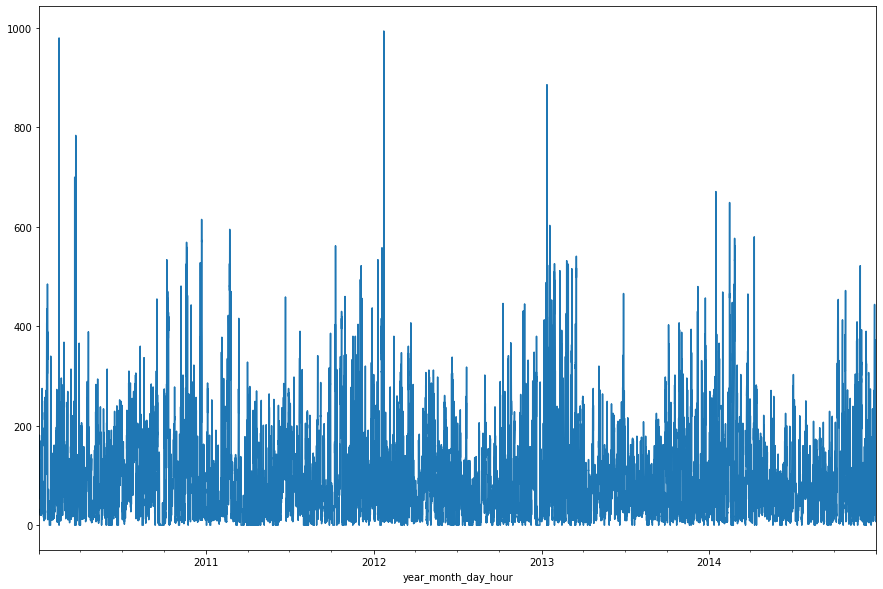

In [ ]:
polution_ts['pollution'].plot(figsize=(15,10));

Donner une représentation par mois de la pollution. Quel est le mois le plus pollué ?

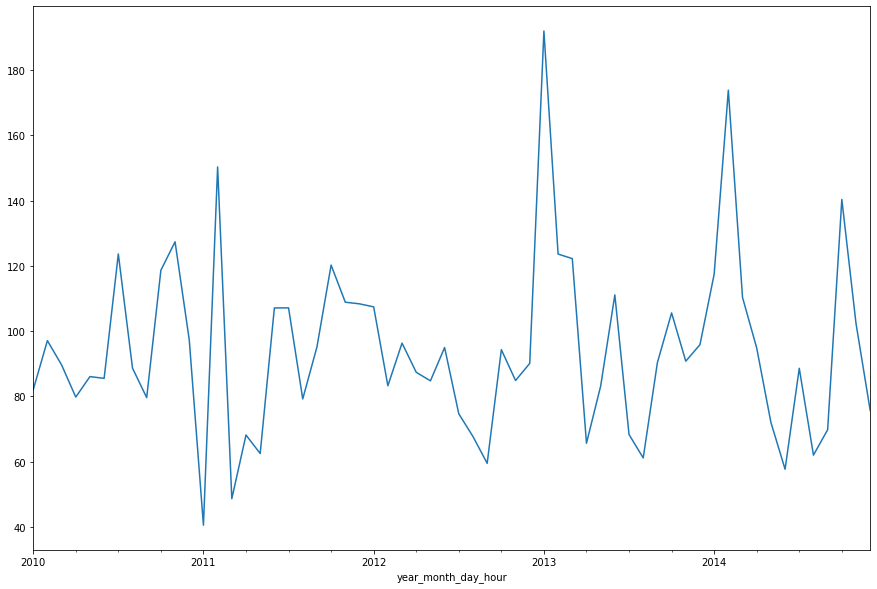

In [ ]:
polution_ts['pollution'].resample('M').mean().plot(figsize=(15,10));

### Etude de stationnarité

#### Decomposition de la serie

En utilisant seasonal_decompose, decomposer votre serie temporelle sous plusieurs échantillonage:

- Par mois
- Par semaines


Un modèle de décomposition consiste à appliquer des transformations pour simplifier sa série temporelle. C’est une méthode très efficace et très générale, son application est omniprésente en analyse des séries temporelles, avec différentes variations.

[Rappel decompostion serie temporelle](https://slideplayer.fr/slide/5546777/17/images/4/MODELES+DE+DECOMPOSITION.jpg
)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


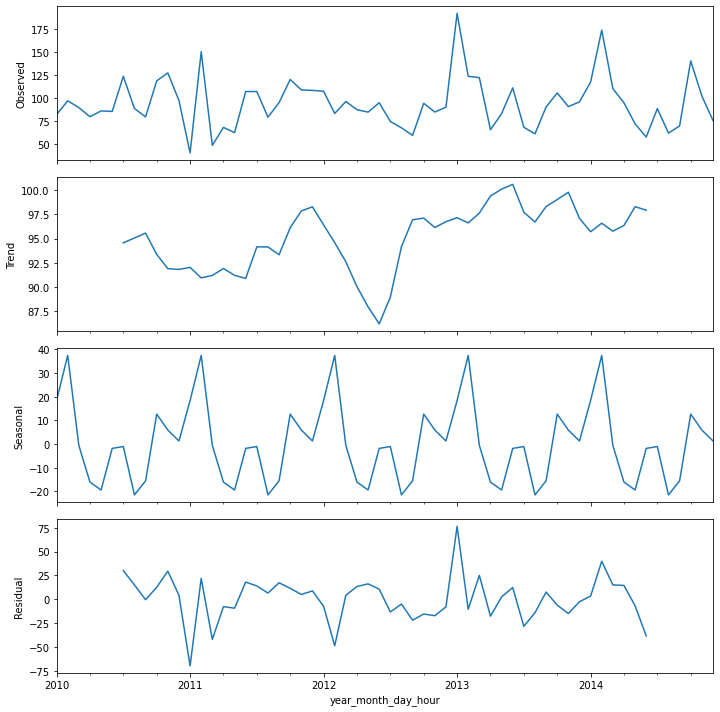

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10, 10)

x=polution_ts["pollution"].resample('M').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

Réaliser cette decompostion en changeant de frequence d'echantillonage (la semaine par exemple)


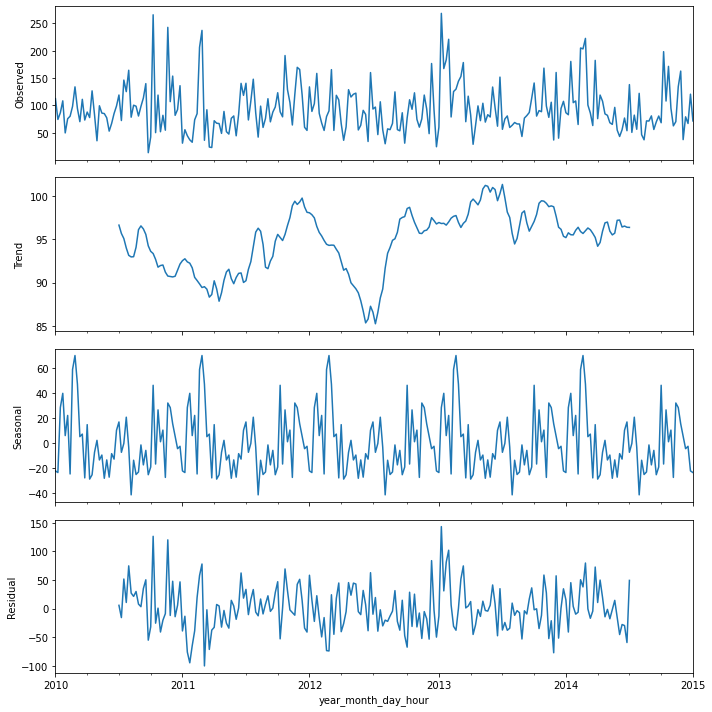

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10, 10)

x=polution_ts["pollution"].resample('w').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

#### Utiliser le score de Dickey-Fuller 

==> extraire une avec p_value = sm.tsa.stattools.adfuller(y)[1] inferieure à 0.05 pour verifier la stationnarité de votre serie 

Echantillonage par semaine

Rappel p value

https://pro.arcgis.com/fr/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm#:~:text=Si%20votre%20score%20z%20est,r%C3%A9sultat%20de%20processus%20spatiaux%20al%C3%A9atoires.

Table de Dickey-Fuller

https://www.real-statistics.com/statistics-tables/augmented-dickey-fuller-table/

In [ ]:

from statsmodels.tsa.stattools import adfuller

x=polution_ts["pollution"].resample('w').mean()



p_value

NameError: ignored

Si la valeur p du test de Dickey-Fuller n'est pas suffisamment significative (< 5 %), le risque de rejeter l'hypothese nulle H0 alors qu'elle est vraie augmente. 

#### Pause sur la différenciation :

- Differenciation
- Ecriture via operateur de retard L


Il est donc possible de rendre stationnaire une série non-stationnaire en la différenciant d fois, c’est à dire de considérer la série {st−st−d}. On parle d’opérateur retard, noté L, appliqué d fois.


Si c'est le cas utiliser x.diff(1) pour differencier votre serie d'un ordre

In [ ]:
adfuller(x.diff(1).dropna())[1]

5.813166165835688e-20

#### Rappel 

L’un des concepts essentiels dans l’étude des séries temporelles est la “stationnarité”. Il s’agit de savoir si les observations d’une série temporelle sont générées par une structure* qui change, ou non, avec le temps.

Une autre façon pratique de vérifier si une série temporelle est stationnaire ou pas est d’étudier l’évolution dans le temps de la structure de sa moyenne, de sa variance et de ses corrélations croisées avec elle-même.

En effet, dans ce cas, la moyenne, la variance et la dépendance entre les valeurs de la série ont une structure finie et indépendante du temps

In [ ]:
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#### Coder une fonction d'autocorellation (sur la serie echantillonée par semaine)

- #### Commencer par creer une fonction d' auto-covariance empirique

- #### Généraliser en creant une fonction d' auto-correlation empiriques.


formules p14 http://math.univ-lille1.fr/~viano/economcours.pdf


- #### Calculer l'autocorelation sur la serie et celle avec un decalage d'un pas de temps

In [ ]:
x=polution_ts["pollution"].dropna().resample('w').mean()


def autocov(x,l):
    m=x.mean()
    n=len(x)
    tmp=0
    for j in range(0, n-l):
        tmp=tmp+(x[j]-m)*(x[j+l]-m)
    return tmp/n


def autocov0(x):
    m=x.mean()
    n=len(x)
    tmp=0
    for j in range(0, n):
        tmp=tmp+(x[j]-m)*(x[j]-m)
    return tmp/n

def auto_correlation(x,j):
    return autocov(x,j)/autocov0(x)

auto_correlation(x,1),auto_correlation(x,2)

(0.15482772975349263, 0.10265069737033239)

In [ ]:
import statsmodels.api as sm
#calculate autocorrelations
sm.tsa.acf(x,nlags=2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([1.        , 0.15482773, 0.1026507 ])

#### Verifier vos calculs avec la fonction acf()  importées precedemment

In [ ]:
acf(x)[1],acf(x)[2]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(0.1548277297534926, 0.10265069737033232)

#### Analyse des autocorrelogrammes

Nous pouvons calculer la corrélation des observations de séries chronologiques avec des observations avec des pas de temps précédents, appelés décalages. Étant donné que la corrélation des observations de la série chronologique est calculée avec les valeurs de la même série à des moments précédents, cela s'appelle une corrélation en série ou une autocorrélation.

Un tracé de l'autocorrélation d'une série chronologique par décalage est appelé la fonction de corrélation automatique , ou l'acronyme ACF . Ce graphique est parfois appelé un corrélogramme ou un graphique d'autocorrélation.

Vous pouvez egalement comparer les resultats de votre fonction avec ceux du plot_acf() ci dessous

Les intervalles de confiance sont dessinés sous forme de cône. Par défaut, il est défini sur un intervalle de confiance de 95 %, ce qui suggère que les valeurs de corrélation en dehors de ce code sont très probablement une corrélation et non un hasard statistique.


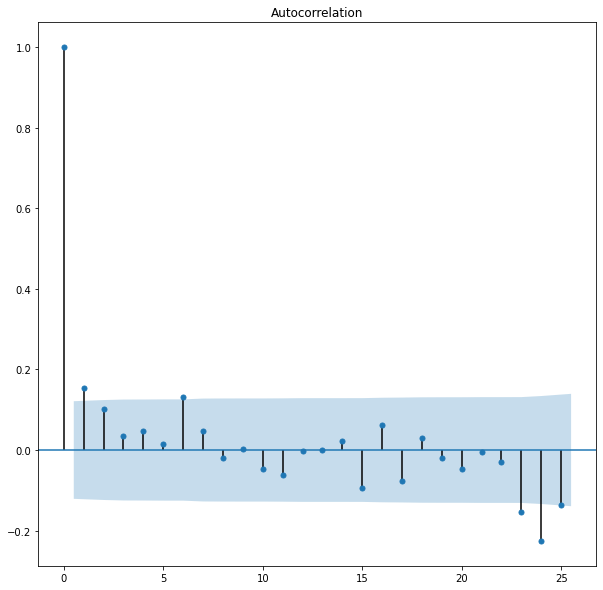

In [ ]:
a=plot_acf(x)

La sortie ACF ne présente pas de décroissance explicite vers 0, ce qui traduit un problème de non-stationnarité. 

==> On effectue donc une différenciation. 

Nous esperons ainsi se rapprocher d'un fonction stationnaire

Il existe de nombreux tests statistiques***  pour déterminer si une série est stationnaire ou pas. Il se peut que la moyenne, la variance et les autocorrélations de la série originale ne soient pas constantes dans le temps mais que les statistiques relatives aux changements de la série entre d périodes sont constantes. 

#### Nous differencions chaque terme avec son precedent et nous esperons obtenir une courbe d'ACF qui tende plus rapidement vers 0 

Tracer cette nouvelle representation

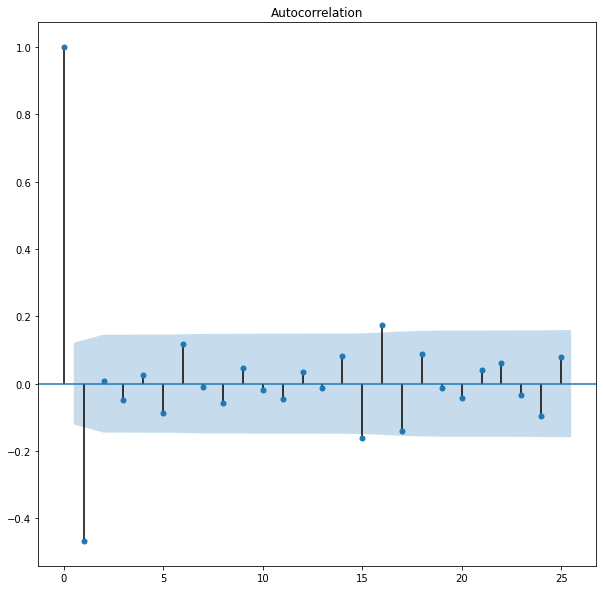

In [ ]:
a=plot_acf(x.diff(1).dropna())

#### PACF (Auto correlation partielle)

Le PACF exprime la corrélation entre les observations faites à deux moments dans le temps tout en tenant compte de l’influence éventuelle d’autres points de données. 

Une autocorrélation partielle est un résumé de la relation entre une observation dans une série chronologique et des observations à des pas de temps antérieurs, les relations des observations intermédiaires étant "supprimées".

Ce sont ces corrélations intermédiaires que la fonction d'autocorrélation partielle cherche à éliminer. Sans entrer dans les calculs, c'est l'intuition de l'autocorrélation partielle.

Nous pouvons utiliser le PACF pour déterminer le nombre optimal de termes à utiliser dans le modèle AR.

[Explication autocorrelation partielle](https://slideplayer.fr/slide/520920/2/images/26/5.+Autocorr%C3%A9lation+partielle.jpg)

[Vulgarisation autocorrelation partielle](https://slideplayer.fr/slide/1847935/7/images/3/D%C3%A9finition+intuitive+des+autocorr%C3%A9lations+partielles.jpg)


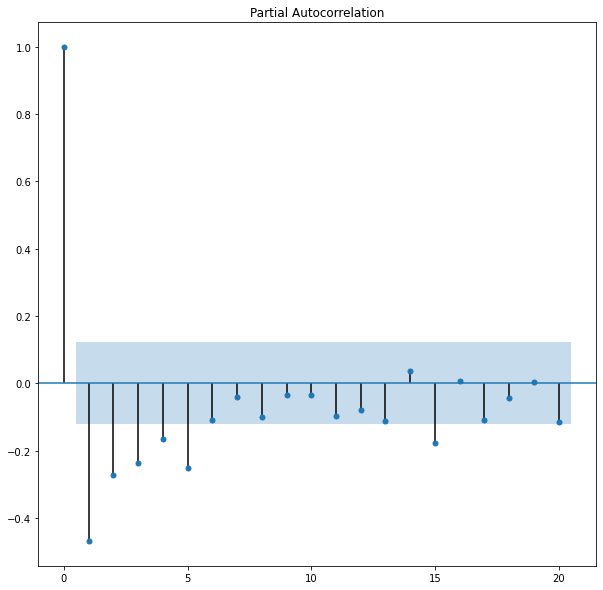

In [ ]:
_ =plot_pacf(x.diff(1).dropna(),lags=20)

#### Intuition d'autorégression

Considérons une série chronologique qui a été générée par un processus d'autorégression (AR) avec un décalage de k .

Nous savons que le PACF ne décrit que la relation directe entre une observation et son décalage. Cela suggérerait qu'il n'y aurait pas de corrélation pour les valeurs de décalage au-delà de k .

C'est exactement l'attente des tracés PACF pour un processus AR(k).

#### Intuition moyenne mobile

Considérons une série chronologique qui a été générée par un processus de moyenne mobile (MA) avec un décalage de k .

N'oubliez pas que le processus de moyenne mobile est un modèle d'autorégression de la série chronologique des erreurs résiduelles des prédictions précédentes. Une autre façon de penser au modèle de moyenne mobile est qu'il corrige les prévisions futures en fonction des erreurs commises sur les prévisions récentes.

Nous nous attendrions à ce que l'ACF pour le processus MA(k) montre une forte corrélation avec les valeurs récentes jusqu'au décalage de k, puis une forte baisse jusqu'à une corrélation faible ou nulle. Par définition, c'est ainsi que le processus a été généré.


Encore une fois, c'est exactement l'attente des tracés ACF pour un processus MA(k).



#### Modèle ARIMA

Le modèle ARIMA, appelé aussi modèle de Box-Jenkis, est la combinaison de trois termes : le terme autorégressif (AR), le terme de différenciation (I) et le terme de moyennes mobiles (MA).

 
- Le terme autorégressif suppose que la valeur à l’instant t est une combinaison linéaire des valeurs des instants précédents plus un terme d’erreur.

- La partie moyennes mobiles suppose que la série est une combinaison linéaire de bruits blancs****

- Enfin, le terme de différenciation est une application de l’opérateur retard L une ou plusieurs fois.




Trois entiers (p, d, q) sont généralement utilisés pour paramétrer les modèles ARIMA :

- p : nombre de termes autorégressifs (ordre AR)

- d : nombre de différences non saisonnières (ordre de différenciation)

- q : nombre de termes moyens mobiles (ordre MA)


#### Identification et estimation de modèles ARMA :


En pratique, lorsque l’on doit ajuster un modèle AR, MA ou ARMA à des données réelles la première question qui se pose est celle du choix des ordres p et q du modèle ARMA (on considère que les AR et MA sont un cas particulier d’ARMA avec respectivement q=0 et p=0). 
Pour choisir ces ordres, nous pouvons exploiter les résultats suivants:


![Times_series.png](attachment:Times_series.png)

Ainsi, on estime un modèle ARIMA(5,1,1) au vu des autocorrélogrammes empiriques simples et partiels et de la differenciation de rang 1 réalisée.

Le processus ARMA :
Comme vous vous en doutez, le modèle ARMA est tout simplement une combinaison d’un processus AR et d’un processus MA. Cela permet de modéliser des séries temporelles plus complexes.

Un modèle ARMA d’ordre (p,q) s’écrit donc sous la forme :


![ARMA](Data/ARIMA.png.webp)

Avec ε l’erreur, (𝛼1, …,𝛼p)   et (𝛽1, …,𝛽q) des réels.

In [ ]:
pip install statsmodels==0.12.2

     |████████████████████████████████| 9.5 MB 7.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip list

In [ ]:
import statsmodels.api as sm
x=polution_ts["pollution"].resample('W').mean().dropna()

# J'entraine avec toutes les observations sauf les 10 dernieres (pour evaluer le modele)
mod = sm.tsa.arima.ARIMA(x[:-10],order=(5, 1, 1))
                                
results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                  252
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1309.068
Date:                Tue, 17 May 2022   AIC                           2632.137
Time:                        09:23:05   BIC                           2656.815
Sample:                    01-03-2010   HQIC                          2642.068
                         - 10-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1496      0.059      2.547      0.011       0.034       0.265
ar.L2          0.0949      0.069      1.374      0.170      -0.041       0.230
ar.L3          0.0210      0.060      0.350      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Tableau récapitulatif : 

    Dans le tableau récapitulatif, il y a 3 sections distinctes. 
    
    La deuxième colonne de la section I contient des mesures utiles qui sont utilisées pour comparer différents modèles ARIMA. 
    
    En règle générale, le modèle avec une probabilité logarithmique plus élevée ou un IC inférieur (AIC, BIC ou HQIC) est meilleur, et vice versa. 
    
##########################################    
**Les critères de choix de modèles les plus courants sont :**

- le critère AIC (Akaïke Information Criterion), qui sera généralement préféré si l’objectif de l’étude est de faire de la prévision
 
AIC = −2 logL(θ) + 2ν, où L(.) est la vraisemblance du modèle, θ représente les paramètres du modèle et ν le nombre de ces paramètres

où, loi normale sera notée : N (µ,σ2).
<img src="Data/like3.png" alt="Drawing" style="width: 400px;"/>

    
- le critère BIC (Bayesian Information Criterion) sera quant à lui généralement préféré si l’objectif de l’étude est de s’ajuster à la série observée, et est défini par :

BIC = −2 logL(θ) + nν

où n est le nombre d’observations de la série.

    Les modèles ayant la plus petite valeur du critère devront être choisis.
    Ces deux critères conduisent donc à séléctionner des modèles dont la vraisemblance est grande, en la pénalisant par la complexité du modèle.
    
        
##########################################   

    La section II du tableau récapitulatif donne des informations sur les différents coefficients des composantes AR et MA, et les constantes utilisées dans le modèle. 
    
    La colonne coef contient la valeur réelle des coefficients et la colonne P>|Z|colonne contient les niveaux de confiance. Cette colonne indique si les coefficients sont significatifs. 
    
    Si le niveau de confiance est fixé à 5 % et les coefficients significatifs ont une valeur < 0,05 dans cette colonne ==> dans ce cas, tous les coefficients semblent significatifs.


Selon le "model summary", celui ci rencontre la condition d'independance du residu (pas de correlation). En effet, la p-value du Ljung-Box test (Prob(Q)) est supperieur à 0.05, donc nous pouvons rejeter l'hypothese nulle d'independance, et nous pouvons esperer que la distribution du residu soit homoscedastic (variance constante) car la p-value du Heteroskedasticity test (Prob(H)) est plus petite que 0.05.


D'autre part, nous pouvons qualifier notre modele en analysant son residu.

Le residu, c'est ce qu'il reste de la serie apres avoir enlever le volet tendance et saisonnier.

Si celui ci passe le test de blancheur (nous voulons un residu tel un bruit blanc), alors notre model devrait etre pas mal

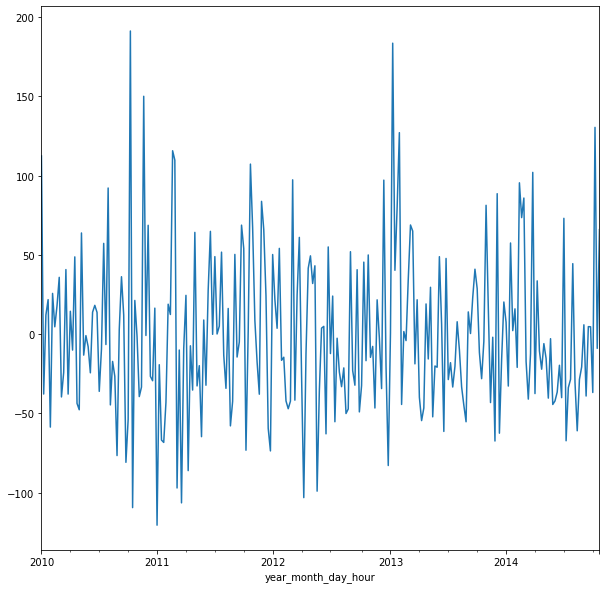

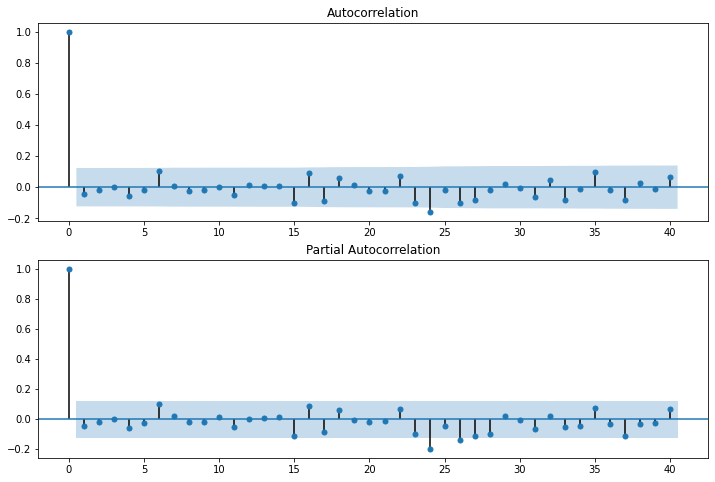

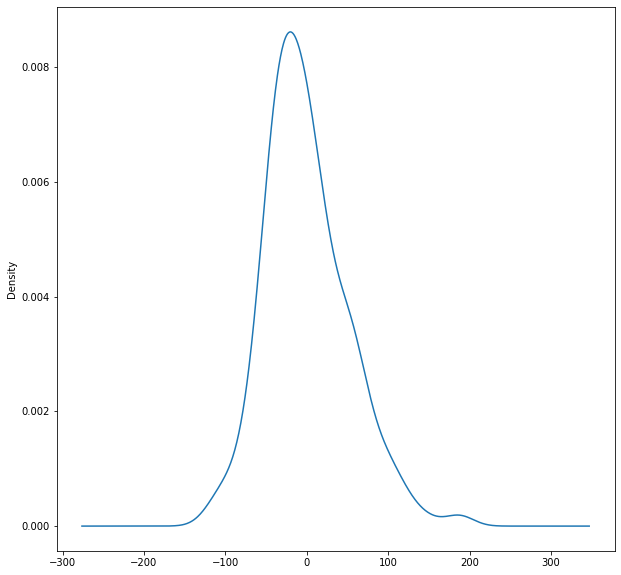

In [ ]:
results.resid.plot()

plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

results.resid.plot(kind="kde")

#### Résidus : 

Si un modèle fonctionne bien, les résidus ou les erreurs commises par le modèle ne doivent pas contenir de modèle sous-jacent. 

Si tel est le cas, le modèle ne parvient pas à capturer toutes les informations contenues dans les données.

Ainsi, un modèle réussi devrait aboutir à des résidus qui n'ont pas de motifs, ou les résidus générés dans un tel cas devraient ressembler à du bruit blanc. Nous esperons que les residus soient normallement distribués centrée sur une moyenne nulle.

Ceci peut être vérifié en s'assurant qu'il n'y a pas de retards significatifs dans les tracés ACF et PACF des résidus. 

Les tracés ACF et PACF des résidus de ce modèle, comme on le voit dans l'image ci-dessus, n'ont presque pas de décalages significatifs. Par conséquent, ce modèle capture assez bien toutes les informations.

#### Prediction sur l'echantillon test

Je valide mon resultat en realisant une prediction sur une periode sur laquelle j'ai les resultats (mais n'ayant pas servis au parametrage des modeles)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


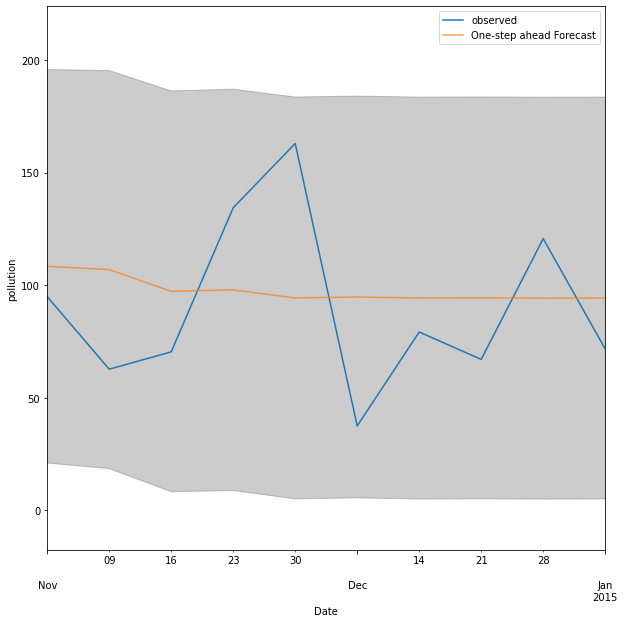

In [ ]:
pred = results.get_prediction(start="2014-01",end="2015-1-04", dynamic=False)

pred_ci = pred.conf_int()



# Je ne trace que les observations et les predictions sur des pas de temps inconnus du modele
ax = x[-10:].plot(label='observed')
pred.predicted_mean[-10:].plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

#### Quantification via RMSE

Calculer le RMSE de cette prédiction

In [ ]:
from sklearn.metrics import mean_squared_error

# Je calcule l'erreur sur les pas de temps inconnus du modele (evaluation de la qualité de prediction)

rms = mean_squared_error(x[-10:], pred.predicted_mean[-10:], squared=False)
rms

37.86923549485811


#### Modifier les parametres (p,d,q), cette fois ci en ne differenciant  pas pas la serie (d=0).

En revenant sur les autocorelogrammes, determiner des nouvelles valeurs de p et q 


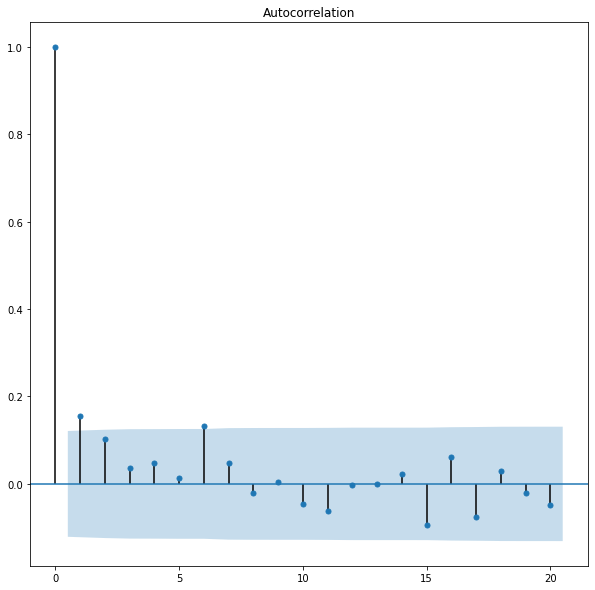

In [ ]:
_ =plot_acf(x.dropna(),lags=20)

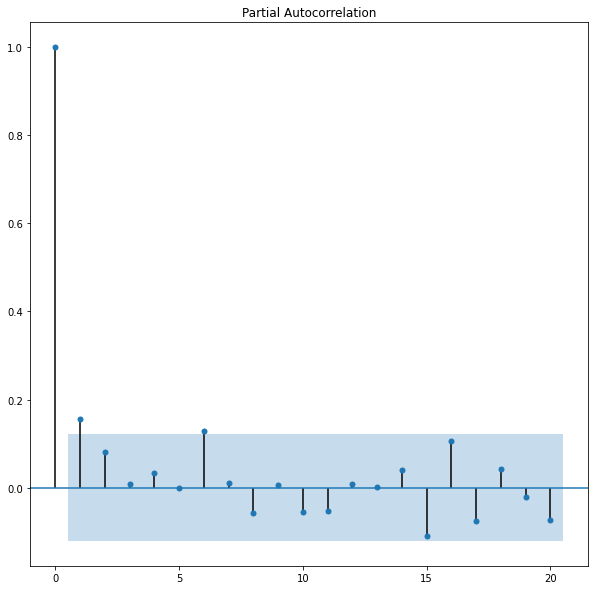

In [ ]:
_ =plot_pacf(x.dropna(),lags=20)

#### Caler votre modele ARMA 

In [ ]:
import statsmodels.api as sm
x=polution_ts["pollution"].resample('W').mean().dropna()

# J'entraine avec toutes les observations sauf les 10 dernieres (pour evaluer le modele)
mod = sm.tsa.arima.ARIMA(x[:-10].dropna(),
                                 order=(1, 0, 1))
                               
results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1311.316
Date:                Tue, 17 May 2022   AIC                           2630.633
Time:                        08:27:39   BIC                           2644.751
Sample:                    01-03-2010   HQIC                          2636.313
                         - 10-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.3642      5.150     18.324      0.000      84.271     104.457
ar.L1          0.6823      0.201      3.387      0.001       0.287       1.077
ma.L1         -0.5394      0.218     -2.479      0.0

Evaluer qualitativement votre résidu

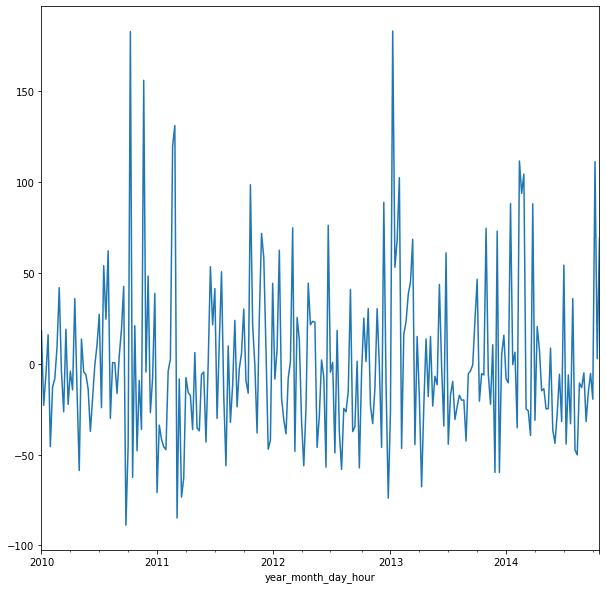

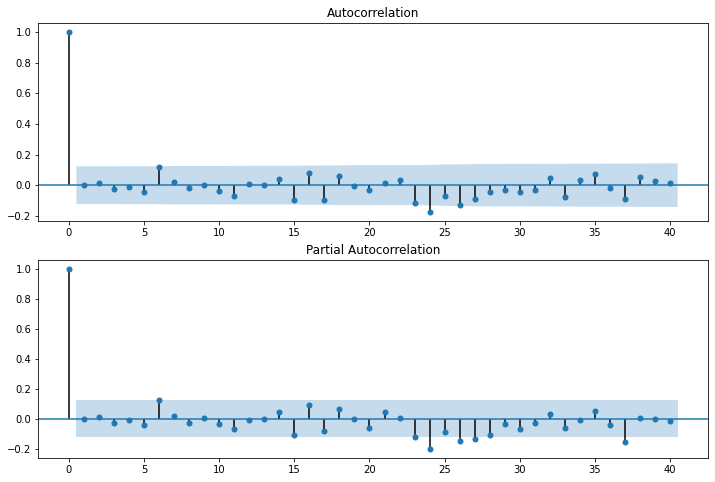

In [ ]:
results.resid.plot()

plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

#### Prediction associée

Representez la prediction de ce nouveau modele sur les 10 dernieres observation de la serie

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


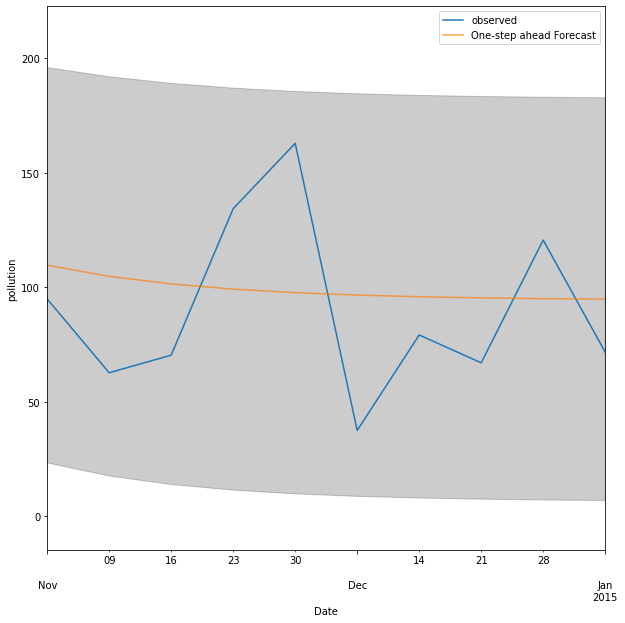

In [ ]:
pred = results.get_prediction(start="2014-01",end="2015-1-04", dynamic=False)
pred_ci = pred.conf_int()


# Je ne trace que les observations et les predictions sur des pas de temps inconnus du modele
ax = x[-10:].plot(label='observed')
pred.predicted_mean[-10:].plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

#### Calculer ce nouveau RMSE

sur l'echantilon d'evaluation (les dix derniers points)

In [ ]:
from sklearn.metrics import mean_squared_error

# Je calcule l'erreur sur les pas de temps inconnus du modele (evaluation de la qualité de prediction)

rms = mean_squared_error(x[-10:], pred.predicted_mean[-10:], squared=False)
rms

37.68877078127708

### Sarima

![SARMA](Data/1_feNkO5nl2ET5EXZ2vG8mQg.png)

SARIMA: Seasonal ARIMA ou ARIMA saisonnier est une extension du modèle ARIMA. 

Le modèle ARIMA exploré ci-dessus ne peut pas capturer efficacement les tendances saisonnières de la série. Pour cela, nous utilisons la classe de modèles SARIMA. SARIMA est l'abréviation de Seasonal Auto-Regressive Integrated Moving Average model. Un modèle SARIMA est spécifié comme suit : SARIMA(p, d, q)(P, D, Q, m)

Il permet de modéliser les séries temporelles comportant une composante saisonnière et désigné par 7 paramètres :

#### Paramètres non saisonniers :

- p (composant AR) : Identique au composant AR dans ARIMA.
- d (composant I) : Identique au composant I dans ARIMA. Indique le nombre de fois qu'une opération de différenciation successive est effectuée pour rendre la série stationnaire.
- q (composant MA) : Identique au composant MA dans ARIMA.

#### Paramètres saisonniers :
- m (période saisonnière) : indique le nombre de périodes dans la série après lesquelles un modèle saisonnier se répète. Il est courant de voir ce paramètre également désigné par la lettre  s.
- P (composante AR saisonnière) : ce paramètre capture l'effet des décalages passés sur les observations actuelles. Contrairement à p , les retards passés sont séparés du retard actuel par des multiples de m retards. Par exemple, si m =12 et P =2, alors l'observation actuelle est estimée à l'aide des observations du 12ème décalage et du 24ème décalage.
- D (composante saisonnière I) : C'est le nombre de fois où les différences saisonnières doivent être calculées pour rendre la série stationnaire. Contrairement à d , où la différenciation a été faite avec des observations successives (1ère série décalée), ici la différenciation se fait entre la série et la m ième série décalée.
- Q (composante MA saisonnière) : ce paramètre capture l'effet des résidus passés sur les observations actuelles. Contrairement à q , les décalages passés sont séparés du décalage actuel par des multiples de m décalages. Par exemple, si m =12 et Q =2, alors l'observation actuelle est estimée à l'aide des résidus du 12ème décalage et du 24ème décalage.


#### Reprenez votre serie echantillonée par semaine avec differenciation

Tracer vos acf et pacf de la serie differenciee d'ordre 1

#### Estimation des paramètres des modèles SARIMA

Les paramètres du SARIMA(p, d, q)(P, D, Q, m) sont estimés en utilisant les directives générales suivantes :

- p : Tracez le tracé PACF pour la série et comptez le nombre de retards significatifs.
- d : Le nombre d'opérations de différenciation successives nécessaires pour convertir la série en stationnaire.
- q : Tracez le graphique ACF pour la série et comptez le nombre de retards significatifs.
- m : Le nombre de décalages après lesquels une tendance saisonnière est observée.
- P : Tracez à nouveau le tracé PACF et observez le nombre de retards significatifs séparés par des multiples de  m.
- D : Le nombre de différences saisonnières nécessaires pour convertir la série en stationnaire.
- Q : Tracez à nouveau le tracé ACF et observez le nombre de retards significatifs séparés par des multiples de  m.

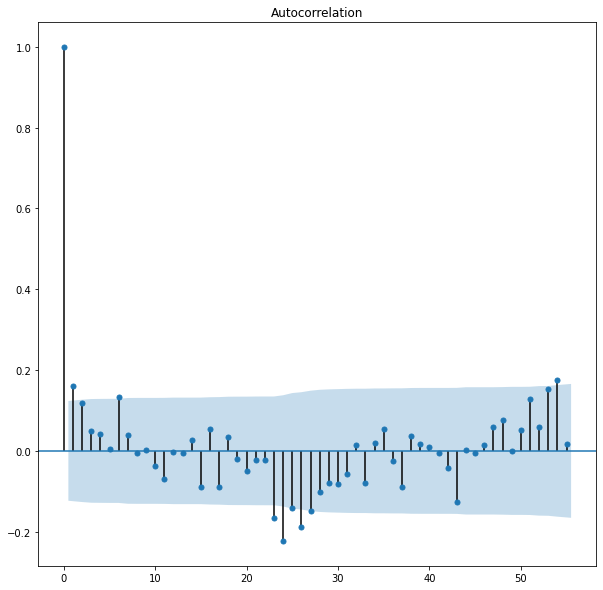

In [ ]:

a=plot_acf(polution_ts["pollution"].resample('w').mean().dropna()[:-10],lags=55)

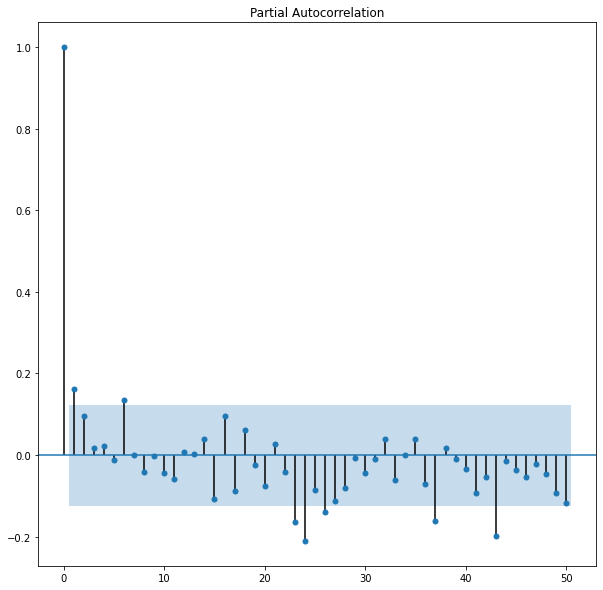

In [ ]:
_=plot_pacf(polution_ts["pollution"].resample('w').mean().dropna()[:-10],lags=50)

In [ ]:
polution_ts["pollution"].resample('w').mean().dropna()[:-10].diff(24).sum(),polution_ts["pollution"].resample('w').mean().dropna()[:-10].diff(24).sum()

(-90.82440476190465, -90.82440476190465)

On estime en premier lieu un modèle SARIMA(5,1,1)(2,1,1)26  au vu des autocorrélogrammes empiriques simples et partiels. 


Estimation des paramètres :

p,d,q sont repris du modele ARIMA precedent

- m = 26  : Les observations sont observées par semaines et il y avait présence d'un motif saisonnier dans la décomposition de la série effectuée plus haut.
- P = 1 ou 2 : le 26e et 52e décalages sont significatif dans le tracé PACF.
- D = 1  : Une différenciation saisonnière effectuée.
- Q = 1 : le 26e  décalages est significatifs dans le tracé ACF. Q=1

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(polution_ts["pollution"].resample('w').mean().dropna()[:-10],
                                order=(5, 1, 1),
                                seasonal_order=(1, 1, 1, 26))
                                

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                                     SARIMAX Results                                      
Dep. Variable:                          pollution   No. Observations:                  252
Model:             SARIMAX(5, 1, 1)x(1, 1, 1, 26)   Log Likelihood               -1205.651
Date:                            Tue, 17 May 2022   AIC                           2429.302
Time:                                    09:16:01   BIC                           2460.047
Sample:                                01-03-2010   HQIC                          2441.711
                                     - 10-26-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1215      0.075      1.610      0.107      -0.026       0.269
ar.L2          0.0954      0.072   

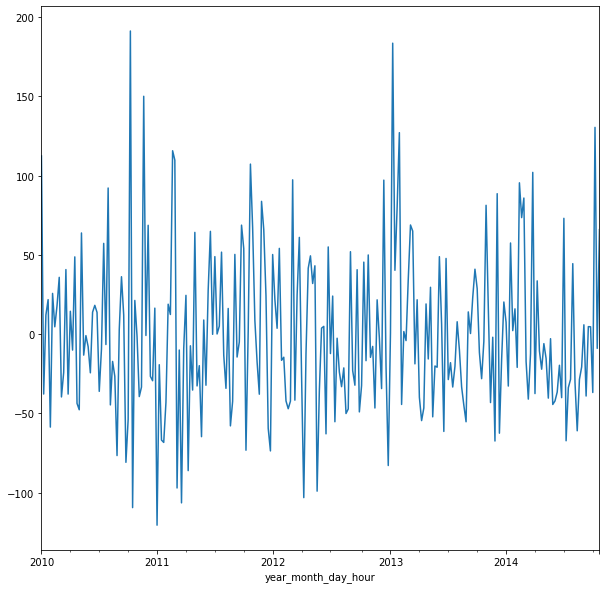

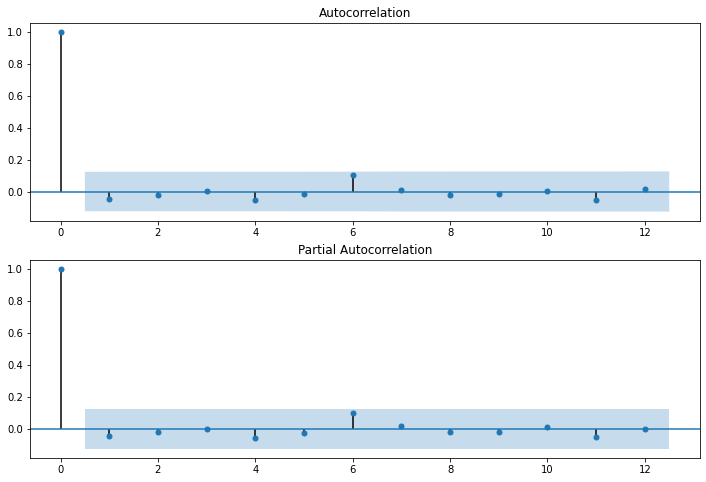

In [ ]:
results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=12, ax=ax2)
plt.show()

Test prediction model

In [ ]:
pred = results.get_prediction(start="2014-01",end="2015-1-04", dynamic=False)
pred_ci = pred.conf_int()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


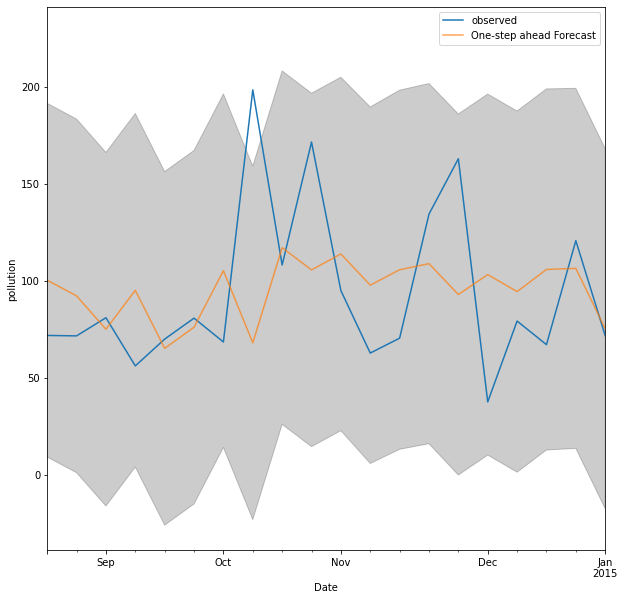

In [ ]:
ax = polution_ts["pollution"].resample('w').mean()[-20:].plot(label='observed')
pred.predicted_mean[-20:].plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(polution_ts["pollution"].resample('W').mean()[-10:], pred.predicted_mean[-10:], squared=False)
rms

37.267871733460346

#### Observation du modele sur un horizon plus grand 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


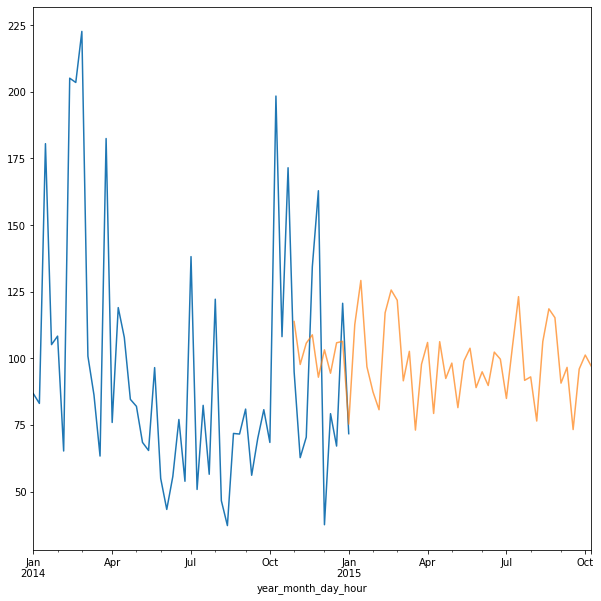

In [ ]:
pred = results.predict(start="2014-12",end="2016")

# OU

pred= results.forecast(50)



ax = polution_ts["pollution"].resample('w').mean()['2014':].plot(label='observed')
pred.plot(label='One-step ahead Forecast', alpha=.7)

Avec cette projection, nous observons le comportement de notre modele. Il semble avoir un seuil/niveau plus élevé. Corrigeons le en modifiant le parametre saisonier (m), lui permettant de travailler sur une année, cett fois ci. 

#### Reprenez ce dernier essai de SARIMA en prenant cette fois ci un m=52 (comme le nombre de semaine de l'année)  ou en echantilonnant par mois avec cette fois ci m =12

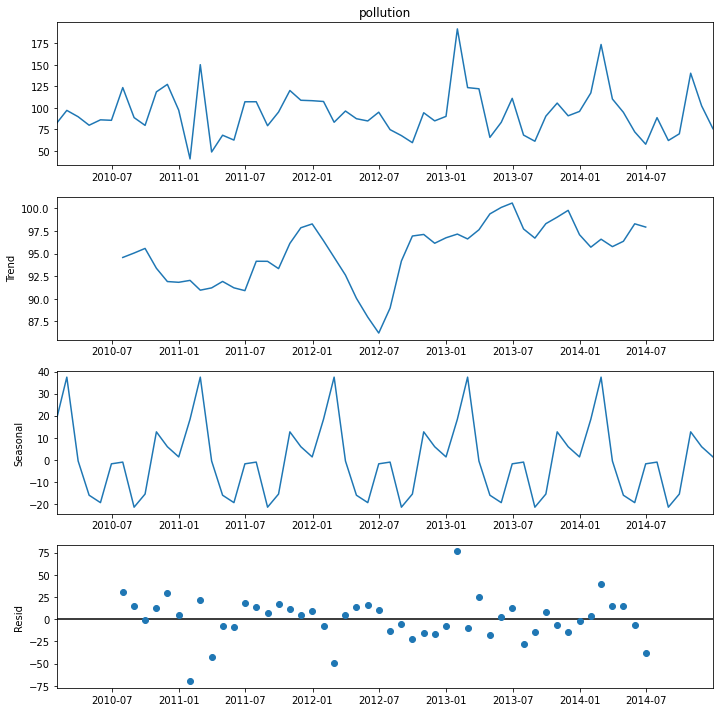

In [ ]:
import seasonal_decompose
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10, 10)

x=polution_ts["pollution"].resample('M').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

In [ ]:

from statsmodels.tsa.stattools import adfuller

x=polution_ts["pollution"].resample('M').mean().diff(1).dropna()

p_value = adfuller(x)[1]

p_value

1.2604401991885106e-06

#### Echantillonnage hebdomadaire

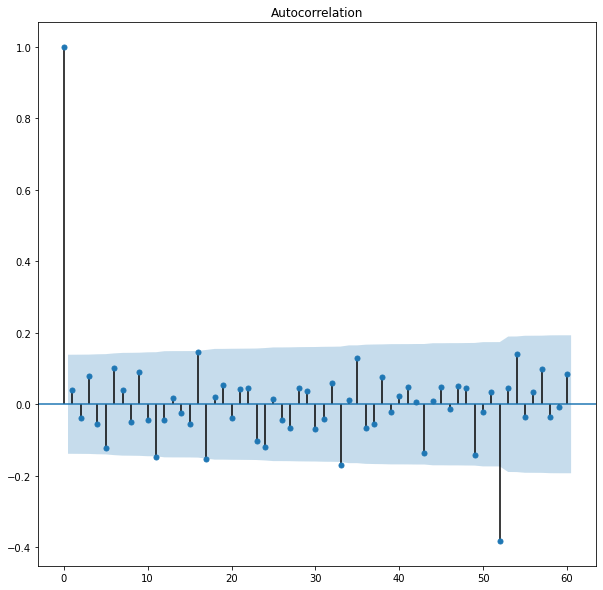

In [ ]:
_=plot_acf(polution_ts["pollution"].resample('W').mean().diff(52).dropna()[:-10],lags=60)

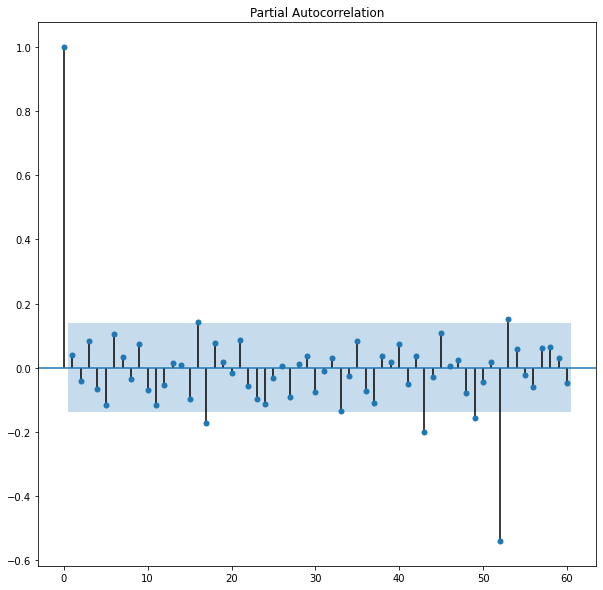

In [ ]:
_=plot_pacf(polution_ts["pollution"].resample('W').mean().diff(52).dropna()[:-10],lags=60)

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(polution_ts["pollution"].resample('W').mean().dropna()[:-10],
                                order=(5, 1, 1),
                                seasonal_order=(2, 1, 2, 52))
                          

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                        SARIMAX Results                                        
Dep. Variable:                               pollution   No. Observations:                  252
Model:             SARIMAX(5, 1, 1)x(2, 1, [1, 2], 52)   Log Likelihood               -1074.570
Date:                                 Tue, 17 May 2022   AIC                           2171.139
Time:                                         09:29:36   BIC                           2207.365
Sample:                                     01-03-2010   HQIC                          2185.801
                                          - 10-26-2014                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1167      0.076      1.529      0.126      -0.033       0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


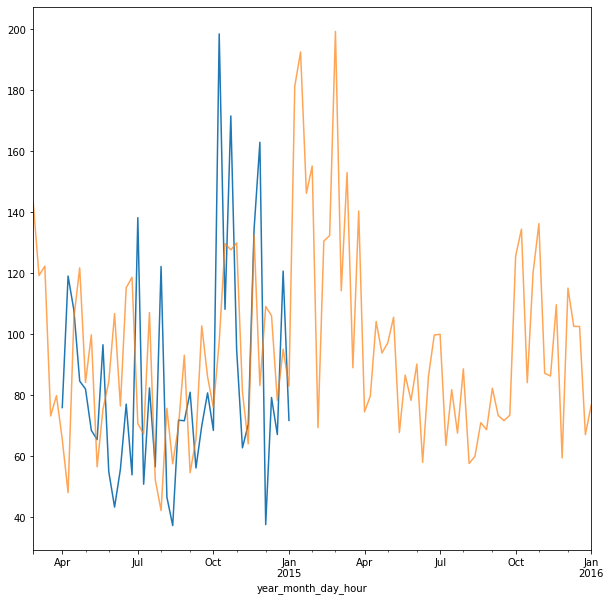

In [ ]:
pred = results.predict(start="2014-3",end="2016")

ax = polution_ts["pollution"].resample('W').mean()[-40:].plot(label='observed')
pred.plot( label='One-step ahead Forecast', alpha=.7)

#### Pour retrouver une des meilleurs combinaisons de parametre nous pouvons simuler nombre d'entre elles et trouver celle qui minimise la metric AIC

Mais ça peut etre tres long ....

In [ ]:
import itertools
import warnings
from tqdm import tqdm

x=polution_ts["pollution"].resample('W').mean()

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



warnings.filterwarnings("ignore") # specify to ignore warning messages
maxi=1000
for param in tqdm(pdq):
    for param_seasonal in tqdm(seasonal_pdq):
        try:
            mod = sm.tsa.statespace.SARIMAX(x,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('########################################')
            print('ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('########################################')
            if results.aic < maxi:
                combi='ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic)
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)
SARIMAX: (0, 0, 2) x (0, 1, 1, 6)


  7%|▋         | 2/27 [00:00<00:01, 13.04it/s]

########################################
ARIMA(0, 0, 0)x(0, 0, 0, 6)6 - AIC:3167.074647894815
########################################
########################################
ARIMA(0, 0, 0)x(0, 0, 1, 6)6 - AIC:2942.5433088276627
########################################



 15%|█▍        | 4/27 [00:00<00:01, 11.64it/s]

########################################
ARIMA(0, 0, 0)x(0, 0, 2, 6)6 - AIC:2840.0660336851215
########################################
########################################
ARIMA(0, 0, 0)x(0, 1, 0, 6)6 - AIC:2805.523511296273
########################################
########################################
ARIMA(0, 0, 0)x(0, 1, 1, 6)6 - AIC:2629.1721840367322
########################################



 22%|██▏       | 6/27 [00:00<00:02,  7.02it/s]

########################################
ARIMA(0, 0, 0)x(0, 1, 2, 6)6 - AIC:2565.8122348113193
########################################
########################################
ARIMA(0, 0, 0)x(0, 2, 0, 6)6 - AIC:3000.402395045685
########################################



 30%|██▉       | 8/27 [00:01<00:02,  7.10it/s]

########################################
ARIMA(0, 0, 0)x(0, 2, 1, 6)6 - AIC:2701.2955818081464
########################################



 33%|███▎      | 9/27 [00:01<00:04,  3.72it/s]

########################################
ARIMA(0, 0, 0)x(0, 2, 2, 6)6 - AIC:2547.6908154989005
########################################
########################################
ARIMA(0, 0, 0)x(1, 0, 0, 6)6 - AIC:2797.0726841255755
########################################



 41%|████      | 11/27 [00:02<00:03,  4.68it/s]

########################################
ARIMA(0, 0, 0)x(1, 0, 1, 6)6 - AIC:2693.213941023981
########################################



 44%|████▍     | 12/27 [00:02<00:03,  4.10it/s]

########################################
ARIMA(0, 0, 0)x(1, 0, 2, 6)6 - AIC:2630.900839611111
########################################
########################################
ARIMA(0, 0, 0)x(1, 1, 0, 6)6 - AIC:2708.3803874380565
########################################



 52%|█████▏    | 14/27 [00:02<00:02,  4.98it/s]

########################################
ARIMA(0, 0, 0)x(1, 1, 1, 6)6 - AIC:2628.8743562754535
########################################



 56%|█████▌    | 15/27 [00:03<00:03,  3.92it/s]

########################################
ARIMA(0, 0, 0)x(1, 1, 2, 6)6 - AIC:2564.3045040688603
########################################
########################################
ARIMA(0, 0, 0)x(1, 2, 0, 6)6 - AIC:2831.5479547633663
########################################



 63%|██████▎   | 17/27 [00:03<00:02,  4.43it/s]

########################################
ARIMA(0, 0, 0)x(1, 2, 1, 6)6 - AIC:2661.7091615750023
########################################



 67%|██████▋   | 18/27 [00:04<00:03,  2.33it/s]

########################################
ARIMA(0, 0, 0)x(1, 2, 2, 6)6 - AIC:2547.8868271036854
########################################
########################################
ARIMA(0, 0, 0)x(2, 0, 0, 6)6 - AIC:2701.3676521445586
########################################



 74%|███████▍  | 20/27 [00:05<00:02,  2.90it/s]

########################################
ARIMA(0, 0, 0)x(2, 0, 1, 6)6 - AIC:2642.116766275578
########################################



 78%|███████▊  | 21/27 [00:05<00:02,  2.50it/s]

########################################
ARIMA(0, 0, 0)x(2, 0, 2, 6)6 - AIC:2627.6334548695995
########################################
########################################
ARIMA(0, 0, 0)x(2, 1, 0, 6)6 - AIC:2619.731439665823
########################################



 85%|████████▌ | 23/27 [00:06<00:01,  2.96it/s]

########################################
ARIMA(0, 0, 0)x(2, 1, 1, 6)6 - AIC:2578.3219585937723
########################################



 93%|█████████▎| 25/27 [00:06<00:00,  3.15it/s]

########################################
ARIMA(0, 0, 0)x(2, 1, 2, 6)6 - AIC:2566.1427175344033
########################################
########################################
ARIMA(0, 0, 0)x(2, 2, 0, 6)6 - AIC:2673.572416347083
########################################



 96%|█████████▋| 26/27 [00:07<00:00,  2.79it/s]

########################################
ARIMA(0, 0, 0)x(2, 2, 1, 6)6 - AIC:2584.914839766824
########################################



  4%|▎         | 1/27 [00:08<03:38,  8.39s/it]

########################################
ARIMA(0, 0, 0)x(2, 2, 2, 6)6 - AIC:2548.4378037110155
########################################



  7%|▋         | 2/27 [00:00<00:01, 12.84it/s]

########################################
ARIMA(0, 0, 1)x(0, 0, 0, 6)6 - AIC:3013.3725469295796
########################################
########################################
ARIMA(0, 0, 1)x(0, 0, 1, 6)6 - AIC:2863.784750023011
########################################



 15%|█▍        | 4/27 [00:00<00:02,  9.20it/s]

########################################
ARIMA(0, 0, 1)x(0, 0, 2, 6)6 - AIC:2777.3510817057468
########################################
########################################
ARIMA(0, 0, 1)x(0, 1, 0, 6)6 - AIC:2792.8810686180614
########################################



 19%|█▊        | 5/27 [00:00<00:03,  6.86it/s]

########################################
ARIMA(0, 0, 1)x(0, 1, 1, 6)6 - AIC:2616.0105290326155
########################################



 22%|██▏       | 6/27 [00:01<00:04,  4.84it/s]

########################################
ARIMA(0, 0, 1)x(0, 1, 2, 6)6 - AIC:2553.23696303586
########################################
########################################
ARIMA(0, 0, 1)x(0, 2, 0, 6)6 - AIC:2987.236659695117
########################################



 30%|██▉       | 8/27 [00:01<00:03,  5.10it/s]

########################################
ARIMA(0, 0, 1)x(0, 2, 1, 6)6 - AIC:2688.3343555026004
########################################



 33%|███▎      | 9/27 [00:02<00:07,  2.41it/s]

########################################
ARIMA(0, 0, 1)x(0, 2, 2, 6)6 - AIC:2533.360146716075
########################################
########################################
ARIMA(0, 0, 1)x(1, 0, 0, 6)6 - AIC:2789.2732130378536
########################################



 41%|████      | 11/27 [00:02<00:04,  3.26it/s]

########################################
ARIMA(0, 0, 1)x(1, 0, 1, 6)6 - AIC:2679.8278151622126
########################################



 44%|████▍     | 12/27 [00:03<00:05,  2.68it/s]

########################################
ARIMA(0, 0, 1)x(1, 0, 2, 6)6 - AIC:2618.6023357409567
########################################
########################################
ARIMA(0, 0, 1)x(1, 1, 0, 6)6 - AIC:2704.492901293357
########################################



 52%|█████▏    | 14/27 [00:03<00:03,  3.33it/s]

########################################
ARIMA(0, 0, 1)x(1, 1, 1, 6)6 - AIC:2615.931387401024
########################################



 59%|█████▉    | 16/27 [00:04<00:03,  3.54it/s]

########################################
ARIMA(0, 0, 1)x(1, 1, 2, 6)6 - AIC:2551.5556278245176
########################################
########################################
ARIMA(0, 0, 1)x(1, 2, 0, 6)6 - AIC:2828.643873803252
########################################



 63%|██████▎   | 17/27 [00:04<00:03,  3.25it/s]

########################################
ARIMA(0, 0, 1)x(1, 2, 1, 6)6 - AIC:2647.5117159925267
########################################



 70%|███████   | 19/27 [00:06<00:03,  2.08it/s]

########################################
ARIMA(0, 0, 1)x(1, 2, 2, 6)6 - AIC:2533.485681347973
########################################
########################################
ARIMA(0, 0, 1)x(2, 0, 0, 6)6 - AIC:2695.0495191398886
########################################



 74%|███████▍  | 20/27 [00:06<00:03,  1.98it/s]

########################################
ARIMA(0, 0, 1)x(2, 0, 1, 6)6 - AIC:2639.110484924692
########################################



 81%|████████▏ | 22/27 [00:07<00:02,  2.06it/s]

########################################
ARIMA(0, 0, 1)x(2, 0, 2, 6)6 - AIC:2614.987842924076
########################################
########################################
ARIMA(0, 0, 1)x(2, 1, 0, 6)6 - AIC:2614.363449896169
########################################



 85%|████████▌ | 23/27 [00:08<00:02,  1.99it/s]

########################################
ARIMA(0, 0, 1)x(2, 1, 1, 6)6 - AIC:2575.3225368870044
########################################



 89%|████████▉ | 24/27 [00:09<00:01,  1.81it/s]

########################################
ARIMA(0, 0, 1)x(2, 1, 2, 6)6 - AIC:2553.418384609591
########################################



 93%|█████████▎| 25/27 [00:09<00:00,  2.22it/s]

########################################
ARIMA(0, 0, 1)x(2, 2, 0, 6)6 - AIC:2671.139988897924
########################################



 96%|█████████▋| 26/27 [00:09<00:00,  1.92it/s]

########################################
ARIMA(0, 0, 1)x(2, 2, 1, 6)6 - AIC:2579.7834082749005
########################################



  7%|▋         | 2/27 [00:19<04:14, 10.17s/it]

########################################
ARIMA(0, 0, 1)x(2, 2, 2, 6)6 - AIC:2534.5715979938345
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(0, 0, 2)x(0, 0, 0, 6)6 - AIC:2931.6061509414385
########################################



  7%|▋         | 2/27 [00:00<00:02,  8.78it/s]

########################################
ARIMA(0, 0, 2)x(0, 0, 1, 6)6 - AIC:2801.8650974164475
########################################



 11%|█         | 3/27 [00:00<00:04,  5.33it/s]

########################################
ARIMA(0, 0, 2)x(0, 0, 2, 6)6 - AIC:2728.8105923366265
########################################
########################################
ARIMA(0, 0, 2)x(0, 1, 0, 6)6 - AIC:2781.4609404737103
########################################



 19%|█▊        | 5/27 [00:00<00:04,  5.13it/s]

########################################
ARIMA(0, 0, 2)x(0, 1, 1, 6)6 - AIC:2606.082164047709
########################################



 26%|██▌       | 7/27 [00:01<00:04,  4.26it/s]

########################################
ARIMA(0, 0, 2)x(0, 1, 2, 6)6 - AIC:2543.04149258671
########################################
########################################
ARIMA(0, 0, 2)x(0, 2, 0, 6)6 - AIC:2974.276343637959
########################################



 30%|██▉       | 8/27 [00:02<00:06,  3.08it/s]

########################################
ARIMA(0, 0, 2)x(0, 2, 1, 6)6 - AIC:2676.803775589816
########################################



 37%|███▋      | 10/27 [00:03<00:06,  2.44it/s]

########################################
ARIMA(0, 0, 2)x(0, 2, 2, 6)6 - AIC:2523.9608983526505
########################################
########################################
ARIMA(0, 0, 2)x(1, 0, 0, 6)6 - AIC:2782.0853345274036
########################################



 41%|████      | 11/27 [00:03<00:06,  2.66it/s]

########################################
ARIMA(0, 0, 2)x(1, 0, 1, 6)6 - AIC:2670.053486549999
########################################



 48%|████▊     | 13/27 [00:04<00:05,  2.44it/s]

########################################
ARIMA(0, 0, 2)x(1, 0, 2, 6)6 - AIC:2607.505270819097
########################################
########################################
ARIMA(0, 0, 2)x(1, 1, 0, 6)6 - AIC:2703.974265247184
########################################



 52%|█████▏    | 14/27 [00:04<00:05,  2.43it/s]

########################################
ARIMA(0, 0, 2)x(1, 1, 1, 6)6 - AIC:2604.9522638775015
########################################



 59%|█████▉    | 16/27 [00:05<00:04,  2.62it/s]

########################################
ARIMA(0, 0, 2)x(1, 1, 2, 6)6 - AIC:2541.5377463907553
########################################
########################################
ARIMA(0, 0, 2)x(1, 2, 0, 6)6 - AIC:2827.6137568643
########################################



 63%|██████▎   | 17/27 [00:06<00:04,  2.32it/s]

########################################
ARIMA(0, 0, 2)x(1, 2, 1, 6)6 - AIC:2636.704673558671
########################################



 70%|███████   | 19/27 [00:08<00:04,  1.72it/s]

########################################
ARIMA(0, 0, 2)x(1, 2, 2, 6)6 - AIC:2523.3666546957834
########################################
########################################
ARIMA(0, 0, 2)x(2, 0, 0, 6)6 - AIC:2692.355326667256
########################################



 74%|███████▍  | 20/27 [00:08<00:04,  1.69it/s]

########################################
ARIMA(0, 0, 2)x(2, 0, 1, 6)6 - AIC:2638.708882506934
########################################



 81%|████████▏ | 22/27 [00:10<00:02,  1.67it/s]

########################################
ARIMA(0, 0, 2)x(2, 0, 2, 6)6 - AIC:2605.1032961818664
########################################
########################################
ARIMA(0, 0, 2)x(2, 1, 0, 6)6 - AIC:2614.1149571012816
########################################



 85%|████████▌ | 23/27 [00:10<00:02,  1.62it/s]

########################################
ARIMA(0, 0, 2)x(2, 1, 1, 6)6 - AIC:2574.6734408390566
########################################



 89%|████████▉ | 24/27 [00:11<00:02,  1.43it/s]

########################################
ARIMA(0, 0, 2)x(2, 1, 2, 6)6 - AIC:2543.312060883892
########################################



 93%|█████████▎| 25/27 [00:11<00:01,  1.70it/s]

########################################
ARIMA(0, 0, 2)x(2, 2, 0, 6)6 - AIC:2672.324192765226
########################################



 96%|█████████▋| 26/27 [00:12<00:00,  1.48it/s]

########################################
ARIMA(0, 0, 2)x(2, 2, 1, 6)6 - AIC:2579.5697414451697
########################################



 11%|█         | 3/27 [00:34<04:54, 12.26s/it]

########################################
ARIMA(0, 0, 2)x(2, 2, 2, 6)6 - AIC:2524.5854028037184
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(0, 1, 0)x(0, 0, 0, 6)6 - AIC:2851.9005809638265
########################################
########################################
ARIMA(0, 1, 0)x(0, 0, 1, 6)6 - AIC:2789.087675181558
########################################


########################################
ARIMA(0, 1, 0)x(0, 0, 2, 6)6 - AIC:2728.8353765442016
########################################


 19%|█▊        | 5/27 [00:00<00:01, 11.43it/s]

########################################
ARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:2931.159580273539
########################################
########################################
ARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:2745.4621524330955
########################################



 26%|██▌       | 7/27 [00:00<00:02,  8.44it/s]

########################################
ARIMA(0, 1, 0)x(0, 1, 2, 6)6 - AIC:2680.644015244706
########################################
########################################
ARIMA(0, 1, 0)x(0, 2, 0, 6)6 - AIC:3124.1530273164
########################################



 30%|██▉       | 8/27 [00:00<00:02,  6.95it/s]

########################################
ARIMA(0, 1, 0)x(0, 2, 1, 6)6 - AIC:2819.147077786628
########################################



 41%|████      | 11/27 [00:01<00:03,  5.18it/s]

########################################
ARIMA(0, 1, 0)x(0, 2, 2, 6)6 - AIC:2653.237683320703
########################################
########################################
ARIMA(0, 1, 0)x(1, 0, 0, 6)6 - AIC:2798.9539695556477
########################################
########################################
ARIMA(0, 1, 0)x(1, 0, 1, 6)6 - AIC:2790.6194032137273
########################################



 44%|████▍     | 12/27 [00:02<00:03,  4.42it/s]

########################################
ARIMA(0, 1, 0)x(1, 0, 2, 6)6 - AIC:2728.7472126286007
########################################
########################################
ARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:2823.919454572047
########################################



 52%|█████▏    | 14/27 [00:02<00:02,  4.97it/s]

########################################
ARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:2746.7198980142
########################################



 56%|█████▌    | 15/27 [00:02<00:02,  4.05it/s]

########################################
ARIMA(0, 1, 0)x(1, 1, 2, 6)6 - AIC:2680.2994433229023
########################################
########################################
ARIMA(0, 1, 0)x(1, 2, 0, 6)6 - AIC:2946.8880305734506
########################################



 63%|██████▎   | 17/27 [00:03<00:02,  4.57it/s]

########################################
ARIMA(0, 1, 0)x(1, 2, 1, 6)6 - AIC:2773.239641345424
########################################



 67%|██████▋   | 18/27 [00:04<00:03,  2.67it/s]

########################################
ARIMA(0, 1, 0)x(1, 2, 2, 6)6 - AIC:2654.21158878638
########################################
########################################
ARIMA(0, 1, 0)x(2, 0, 0, 6)6 - AIC:2739.077470174974
########################################



 74%|███████▍  | 20/27 [00:04<00:02,  3.28it/s]

########################################
ARIMA(0, 1, 0)x(2, 0, 1, 6)6 - AIC:2739.115494594488
########################################



 78%|███████▊  | 21/27 [00:04<00:01,  3.19it/s]

########################################
ARIMA(0, 1, 0)x(2, 0, 2, 6)6 - AIC:2729.631671412206
########################################
########################################
ARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:2726.8657564163914
########################################



 85%|████████▌ | 23/27 [00:05<00:01,  3.46it/s]

########################################
ARIMA(0, 1, 0)x(2, 1, 1, 6)6 - AIC:2693.221518360793
########################################



 93%|█████████▎| 25/27 [00:06<00:00,  3.30it/s]

########################################
ARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:2682.1630953591184
########################################
########################################
ARIMA(0, 1, 0)x(2, 2, 0, 6)6 - AIC:2789.6490626711
########################################



 96%|█████████▋| 26/27 [00:06<00:00,  2.68it/s]

########################################
ARIMA(0, 1, 0)x(2, 2, 1, 6)6 - AIC:2688.990159285555
########################################



 15%|█▍        | 4/27 [00:42<04:07, 10.74s/it]

########################################
ARIMA(0, 1, 0)x(2, 2, 2, 6)6 - AIC:2655.680329941889
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(0, 1, 1)x(0, 0, 0, 6)6 - AIC:2715.6427006047634
########################################



  7%|▋         | 2/27 [00:00<00:02,  8.33it/s]

########################################
ARIMA(0, 1, 1)x(0, 0, 1, 6)6 - AIC:2651.8073194103617
########################################



 15%|█▍        | 4/27 [00:00<00:03,  5.81it/s]

########################################
ARIMA(0, 1, 1)x(0, 0, 2, 6)6 - AIC:2595.358601194088
########################################
########################################
ARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:2791.3174119796163
########################################



 19%|█▊        | 5/27 [00:00<00:04,  4.72it/s]

########################################
ARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:2618.403839317414
########################################



 22%|██▏       | 6/27 [00:01<00:06,  3.43it/s]

########################################
ARIMA(0, 1, 1)x(0, 1, 2, 6)6 - AIC:2557.895773098896
########################################



 26%|██▌       | 7/27 [00:01<00:05,  3.65it/s]

########################################
ARIMA(0, 1, 1)x(0, 2, 0, 6)6 - AIC:2983.913734287151
########################################



 30%|██▉       | 8/27 [00:02<00:06,  2.75it/s]

########################################
ARIMA(0, 1, 1)x(0, 2, 1, 6)6 - AIC:2690.9677659157774
########################################



 37%|███▋      | 10/27 [00:03<00:07,  2.15it/s]

########################################
ARIMA(0, 1, 1)x(0, 2, 2, 6)6 - AIC:2536.111241324913
########################################
########################################
ARIMA(0, 1, 1)x(1, 0, 0, 6)6 - AIC:2672.054617188044
########################################



 41%|████      | 11/27 [00:03<00:07,  2.27it/s]

########################################
ARIMA(0, 1, 1)x(1, 0, 1, 6)6 - AIC:2652.273556615748
########################################



 44%|████▍     | 12/27 [00:04<00:07,  2.02it/s]

########################################
ARIMA(0, 1, 1)x(1, 0, 2, 6)6 - AIC:2594.7031981608197
########################################



 48%|████▊     | 13/27 [00:04<00:05,  2.42it/s]

########################################
ARIMA(0, 1, 1)x(1, 1, 0, 6)6 - AIC:2705.917797171869
########################################



 52%|█████▏    | 14/27 [00:05<00:05,  2.34it/s]

########################################
ARIMA(0, 1, 1)x(1, 1, 1, 6)6 - AIC:2620.0534091780683
########################################



 56%|█████▌    | 15/27 [00:06<00:06,  1.84it/s]

########################################
ARIMA(0, 1, 1)x(1, 1, 2, 6)6 - AIC:2553.802494586924
########################################



 59%|█████▉    | 16/27 [00:06<00:05,  1.87it/s]

########################################
ARIMA(0, 1, 1)x(1, 2, 0, 6)6 - AIC:2828.100766574509
########################################



 63%|██████▎   | 17/27 [00:07<00:05,  1.85it/s]

########################################
ARIMA(0, 1, 1)x(1, 2, 1, 6)6 - AIC:2652.437487603298
########################################



 67%|██████▋   | 18/27 [00:09<00:08,  1.05it/s]

########################################
ARIMA(0, 1, 1)x(1, 2, 2, 6)6 - AIC:2537.810318123473
########################################



 70%|███████   | 19/27 [00:09<00:05,  1.34it/s]

########################################
ARIMA(0, 1, 1)x(2, 0, 0, 6)6 - AIC:2615.240011151308
########################################



 74%|███████▍  | 20/27 [00:09<00:04,  1.49it/s]

########################################
ARIMA(0, 1, 1)x(2, 0, 1, 6)6 - AIC:2613.9517967543734
########################################



 78%|███████▊  | 21/27 [00:10<00:03,  1.56it/s]

########################################
ARIMA(0, 1, 1)x(2, 0, 2, 6)6 - AIC:2596.12149567175
########################################



 81%|████████▏ | 22/27 [00:10<00:02,  1.93it/s]

########################################
ARIMA(0, 1, 1)x(2, 1, 0, 6)6 - AIC:2618.609904763386
########################################



 85%|████████▌ | 23/27 [00:11<00:02,  1.73it/s]

########################################
ARIMA(0, 1, 1)x(2, 1, 1, 6)6 - AIC:2579.818608927252
########################################



 89%|████████▉ | 24/27 [00:12<00:02,  1.35it/s]

########################################
ARIMA(0, 1, 1)x(2, 1, 2, 6)6 - AIC:2556.712140634296
########################################



 93%|█████████▎| 25/27 [00:14<00:02,  1.01s/it]

########################################
ARIMA(0, 1, 1)x(2, 2, 0, 6)6 - AIC:2670.788786809803
########################################



 96%|█████████▋| 26/27 [00:14<00:00,  1.02it/s]

########################################
ARIMA(0, 1, 1)x(2, 2, 1, 6)6 - AIC:2584.4166219237836
########################################



 19%|█▊        | 5/27 [00:59<04:46, 13.00s/it]

########################################
ARIMA(0, 1, 1)x(2, 2, 2, 6)6 - AIC:2539.18066428398
########################################



  4%|▎         | 1/27 [00:00<00:02,  8.97it/s]

########################################
ARIMA(0, 1, 2)x(0, 0, 0, 6)6 - AIC:2700.1236155975294
########################################



  7%|▋         | 2/27 [00:00<00:04,  5.81it/s]

########################################
ARIMA(0, 1, 2)x(0, 0, 1, 6)6 - AIC:2639.2216914422324
########################################



 15%|█▍        | 4/27 [00:00<00:05,  4.34it/s]

########################################
ARIMA(0, 1, 2)x(0, 0, 2, 6)6 - AIC:2582.346456763302
########################################
########################################
ARIMA(0, 1, 2)x(0, 1, 0, 6)6 - AIC:2778.3657660030703
########################################



 19%|█▊        | 5/27 [00:01<00:05,  3.94it/s]

########################################
ARIMA(0, 1, 2)x(0, 1, 1, 6)6 - AIC:2606.0732046209932
########################################



 22%|██▏       | 6/27 [00:01<00:08,  2.52it/s]

########################################
ARIMA(0, 1, 2)x(0, 1, 2, 6)6 - AIC:2544.020003690787
########################################



 26%|██▌       | 7/27 [00:02<00:07,  2.69it/s]

########################################
ARIMA(0, 1, 2)x(0, 2, 0, 6)6 - AIC:2969.9500055199114
########################################



 30%|██▉       | 8/27 [00:02<00:08,  2.27it/s]

########################################
ARIMA(0, 1, 2)x(0, 2, 1, 6)6 - AIC:2677.3419063535935
########################################



 33%|███▎      | 9/27 [00:03<00:11,  1.56it/s]

########################################
ARIMA(0, 1, 2)x(0, 2, 2, 6)6 - AIC:2525.9742791160857
########################################



 37%|███▋      | 10/27 [00:04<00:08,  1.96it/s]

########################################
ARIMA(0, 1, 2)x(1, 0, 0, 6)6 - AIC:2668.7921662429867
########################################



 41%|████      | 11/27 [00:04<00:07,  2.12it/s]

########################################
ARIMA(0, 1, 2)x(1, 0, 1, 6)6 - AIC:2639.8248133141483
########################################



 44%|████▍     | 12/27 [00:05<00:07,  1.93it/s]

########################################
ARIMA(0, 1, 2)x(1, 0, 2, 6)6 - AIC:2581.7859506782224
########################################



 48%|████▊     | 13/27 [00:05<00:06,  2.20it/s]

########################################
ARIMA(0, 1, 2)x(1, 1, 0, 6)6 - AIC:2701.824330201971
########################################



 52%|█████▏    | 14/27 [00:05<00:06,  2.11it/s]

########################################
ARIMA(0, 1, 2)x(1, 1, 1, 6)6 - AIC:2606.3348369589994
########################################



 56%|█████▌    | 15/27 [00:06<00:07,  1.63it/s]

########################################
ARIMA(0, 1, 2)x(1, 1, 2, 6)6 - AIC:2541.034785539498
########################################



 59%|█████▉    | 16/27 [00:07<00:06,  1.60it/s]

########################################
ARIMA(0, 1, 2)x(1, 2, 0, 6)6 - AIC:2825.0132014533433
########################################



 63%|██████▎   | 17/27 [00:08<00:06,  1.57it/s]

########################################
ARIMA(0, 1, 2)x(1, 2, 1, 6)6 - AIC:2637.448492607103
########################################



 67%|██████▋   | 18/27 [00:10<00:10,  1.12s/it]

########################################
ARIMA(0, 1, 2)x(1, 2, 2, 6)6 - AIC:2526.709919127401
########################################



 70%|███████   | 19/27 [00:10<00:07,  1.13it/s]

########################################
ARIMA(0, 1, 2)x(2, 0, 0, 6)6 - AIC:2612.132112869576
########################################



 74%|███████▍  | 20/27 [00:11<00:05,  1.26it/s]

########################################
ARIMA(0, 1, 2)x(2, 0, 1, 6)6 - AIC:2610.807117524936
########################################



 78%|███████▊  | 21/27 [00:12<00:04,  1.25it/s]

########################################
ARIMA(0, 1, 2)x(2, 0, 2, 6)6 - AIC:2583.139303112474
########################################



 81%|████████▏ | 22/27 [00:12<00:03,  1.40it/s]

########################################
ARIMA(0, 1, 2)x(2, 1, 0, 6)6 - AIC:2611.7807052945172
########################################



 85%|████████▌ | 23/27 [00:13<00:03,  1.26it/s]

########################################
ARIMA(0, 1, 2)x(2, 1, 1, 6)6 - AIC:2575.7812935820075
########################################



 89%|████████▉ | 24/27 [00:14<00:02,  1.09it/s]

########################################
ARIMA(0, 1, 2)x(2, 1, 2, 6)6 - AIC:2543.0272412421664
########################################



 93%|█████████▎| 25/27 [00:15<00:01,  1.05it/s]

########################################
ARIMA(0, 1, 2)x(2, 2, 0, 6)6 - AIC:2668.14021425177
########################################



 96%|█████████▋| 26/27 [00:17<00:01,  1.05s/it]

########################################
ARIMA(0, 1, 2)x(2, 2, 1, 6)6 - AIC:2581.8144891036773
########################################



 22%|██▏       | 6/27 [01:19<05:20, 15.26s/it]

########################################
ARIMA(0, 1, 2)x(2, 2, 2, 6)6 - AIC:2527.8622021728684
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(0, 2, 0)x(0, 0, 0, 6)6 - AIC:3120.5976267473643
########################################
########################################
ARIMA(0, 2, 0)x(0, 0, 1, 6)6 - AIC:3051.69924325968
########################################



 11%|█         | 3/27 [00:00<00:01, 13.57it/s]

########################################
ARIMA(0, 2, 0)x(0, 0, 2, 6)6 - AIC:2984.9594534935054
########################################
########################################
ARIMA(0, 2, 0)x(0, 1, 0, 6)6 - AIC:3194.1585678802485
########################################
########################################
ARIMA(0, 2, 0)x(0, 1, 1, 6)6 - AIC:2999.709367994761
########################################



 26%|██▌       | 7/27 [00:00<00:02,  7.41it/s]

########################################
ARIMA(0, 2, 0)x(0, 1, 2, 6)6 - AIC:2928.403341244486
########################################
########################################
ARIMA(0, 2, 0)x(0, 2, 0, 6)6 - AIC:3381.079087354042
########################################



 30%|██▉       | 8/27 [00:01<00:03,  5.84it/s]

########################################
ARIMA(0, 2, 0)x(0, 2, 1, 6)6 - AIC:3068.945376637618
########################################



 41%|████      | 11/27 [00:02<00:03,  4.55it/s]

########################################
ARIMA(0, 2, 0)x(0, 2, 2, 6)6 - AIC:2893.0916272971663
########################################
########################################
ARIMA(0, 2, 0)x(1, 0, 0, 6)6 - AIC:3062.4514879796234
########################################
########################################
ARIMA(0, 2, 0)x(1, 0, 1, 6)6 - AIC:3052.9382177955176
########################################



 44%|████▍     | 12/27 [00:02<00:03,  3.94it/s]

########################################
ARIMA(0, 2, 0)x(1, 0, 2, 6)6 - AIC:2984.068423041216
########################################
########################################
ARIMA(0, 2, 0)x(1, 1, 0, 6)6 - AIC:3078.0556711374325
########################################



 52%|█████▏    | 14/27 [00:02<00:02,  4.38it/s]

########################################
ARIMA(0, 2, 0)x(1, 1, 1, 6)6 - AIC:3000.995667534561
########################################



 56%|█████▌    | 15/27 [00:03<00:03,  3.28it/s]

########################################
ARIMA(0, 2, 0)x(1, 1, 2, 6)6 - AIC:2928.4251328677046
########################################
########################################
ARIMA(0, 2, 0)x(1, 2, 0, 6)6 - AIC:3196.3021093225834
########################################



 63%|██████▎   | 17/27 [00:03<00:02,  3.62it/s]

########################################
ARIMA(0, 2, 0)x(1, 2, 1, 6)6 - AIC:3018.7421780399936
########################################



 74%|███████▍  | 20/27 [00:05<00:02,  2.97it/s]

########################################
ARIMA(0, 2, 0)x(1, 2, 2, 6)6 - AIC:2893.9734913194106
########################################
########################################
ARIMA(0, 2, 0)x(2, 0, 0, 6)6 - AIC:2996.0107189286146
########################################
########################################
ARIMA(0, 2, 0)x(2, 0, 1, 6)6 - AIC:2998.00990584909
########################################



 78%|███████▊  | 21/27 [00:05<00:02,  2.76it/s]

########################################
ARIMA(0, 2, 0)x(2, 0, 2, 6)6 - AIC:2985.068855279278
########################################
########################################
ARIMA(0, 2, 0)x(2, 1, 0, 6)6 - AIC:2973.011222617324
########################################



 85%|████████▌ | 23/27 [00:06<00:01,  3.04it/s]

########################################
ARIMA(0, 2, 0)x(2, 1, 1, 6)6 - AIC:2941.7208360736686
########################################



 93%|█████████▎| 25/27 [00:07<00:00,  2.97it/s]

########################################
ARIMA(0, 2, 0)x(2, 1, 2, 6)6 - AIC:2930.0447069137217
########################################
########################################
ARIMA(0, 2, 0)x(2, 2, 0, 6)6 - AIC:3029.4494090367325
########################################



 96%|█████████▋| 26/27 [00:07<00:00,  2.34it/s]

########################################
ARIMA(0, 2, 0)x(2, 2, 1, 6)6 - AIC:2928.224710496947
########################################



 26%|██▌       | 7/27 [01:28<04:26, 13.31s/it]

########################################
ARIMA(0, 2, 0)x(2, 2, 2, 6)6 - AIC:2895.8507769190737
########################################



  4%|▎         | 1/27 [00:00<00:03,  7.90it/s]

########################################
ARIMA(0, 2, 1)x(0, 0, 0, 6)6 - AIC:2838.2519486547444
########################################



  7%|▋         | 2/27 [00:00<00:05,  4.35it/s]

########################################
ARIMA(0, 2, 1)x(0, 0, 1, 6)6 - AIC:2774.5469401896307
########################################



 15%|█▍        | 4/27 [00:00<00:05,  4.08it/s]

########################################
ARIMA(0, 2, 1)x(0, 0, 2, 6)6 - AIC:2714.587051439592
########################################
########################################
ARIMA(0, 2, 1)x(0, 1, 0, 6)6 - AIC:2915.8219494128034
########################################



 19%|█▊        | 5/27 [00:01<00:05,  3.67it/s]

########################################
ARIMA(0, 2, 1)x(0, 1, 1, 6)6 - AIC:2733.738653892593
########################################



 22%|██▏       | 6/27 [00:01<00:08,  2.42it/s]

########################################
ARIMA(0, 2, 1)x(0, 1, 2, 6)6 - AIC:2669.6869962894725
########################################



 26%|██▌       | 7/27 [00:02<00:07,  2.68it/s]

########################################
ARIMA(0, 2, 1)x(0, 2, 0, 6)6 - AIC:3105.777038427919
########################################



 30%|██▉       | 8/27 [00:02<00:07,  2.45it/s]

########################################
ARIMA(0, 2, 1)x(0, 2, 1, 6)6 - AIC:2807.323992927725
########################################



 37%|███▋      | 10/27 [00:04<00:08,  1.97it/s]

########################################
ARIMA(0, 2, 1)x(0, 2, 2, 6)6 - AIC:2644.6134103641425
########################################
########################################
ARIMA(0, 2, 1)x(1, 0, 0, 6)6 - AIC:2796.1121954749715
########################################



 41%|████      | 11/27 [00:04<00:07,  2.19it/s]

########################################
ARIMA(0, 2, 1)x(1, 0, 1, 6)6 - AIC:2776.4885535714775
########################################



 44%|████▍     | 12/27 [00:05<00:07,  2.00it/s]

########################################
ARIMA(0, 2, 1)x(1, 0, 2, 6)6 - AIC:2713.803397674902
########################################



 48%|████▊     | 13/27 [00:05<00:05,  2.40it/s]

########################################
ARIMA(0, 2, 1)x(1, 1, 0, 6)6 - AIC:2820.9248295309662
########################################



 52%|█████▏    | 14/27 [00:05<00:05,  2.39it/s]

########################################
ARIMA(0, 2, 1)x(1, 1, 1, 6)6 - AIC:2735.5504500472084
########################################



 56%|█████▌    | 15/27 [00:06<00:06,  1.95it/s]

########################################
ARIMA(0, 2, 1)x(1, 1, 2, 6)6 - AIC:2668.3441769622727
########################################



 59%|█████▉    | 16/27 [00:06<00:05,  1.98it/s]

########################################
ARIMA(0, 2, 1)x(1, 2, 0, 6)6 - AIC:2942.8751953940505
########################################



 63%|██████▎   | 17/27 [00:07<00:05,  1.74it/s]

########################################
ARIMA(0, 2, 1)x(1, 2, 1, 6)6 - AIC:2762.5256824941775
########################################



 67%|██████▋   | 18/27 [00:09<00:08,  1.07it/s]

########################################
ARIMA(0, 2, 1)x(1, 2, 2, 6)6 - AIC:2646.33057100719
########################################



 70%|███████   | 19/27 [00:09<00:06,  1.27it/s]

########################################
ARIMA(0, 2, 1)x(2, 0, 0, 6)6 - AIC:2735.5255386659287
########################################



 74%|███████▍  | 20/27 [00:10<00:05,  1.37it/s]

########################################
ARIMA(0, 2, 1)x(2, 0, 1, 6)6 - AIC:2735.5427178731497
########################################



 78%|███████▊  | 21/27 [00:11<00:04,  1.32it/s]

########################################
ARIMA(0, 2, 1)x(2, 0, 2, 6)6 - AIC:2715.3919133458003
########################################



 81%|████████▏ | 22/27 [00:11<00:03,  1.49it/s]

########################################
ARIMA(0, 2, 1)x(2, 1, 0, 6)6 - AIC:2724.0006836704633
########################################



 85%|████████▌ | 23/27 [00:12<00:02,  1.41it/s]

########################################
ARIMA(0, 2, 1)x(2, 1, 1, 6)6 - AIC:2692.541605114566
########################################



 89%|████████▉ | 24/27 [00:13<00:02,  1.19it/s]

########################################
ARIMA(0, 2, 1)x(2, 1, 2, 6)6 - AIC:2670.3370132773975
########################################



 93%|█████████▎| 25/27 [00:14<00:01,  1.20it/s]

########################################
ARIMA(0, 2, 1)x(2, 2, 0, 6)6 - AIC:2786.2892554903156
########################################



 96%|█████████▋| 26/27 [00:15<00:00,  1.01it/s]

########################################
ARIMA(0, 2, 1)x(2, 2, 1, 6)6 - AIC:2690.714576787237
########################################



 30%|██▉       | 8/27 [01:47<04:45, 15.00s/it]

########################################
ARIMA(0, 2, 1)x(2, 2, 2, 6)6 - AIC:2647.8105891131663
########################################



  4%|▎         | 1/27 [00:00<00:05,  4.88it/s]

########################################
ARIMA(0, 2, 2)x(0, 0, 0, 6)6 - AIC:2705.4565500152567
########################################



  7%|▋         | 2/27 [00:00<00:06,  3.61it/s]

########################################
ARIMA(0, 2, 2)x(0, 0, 1, 6)6 - AIC:2646.805684876409
########################################



 11%|█         | 3/27 [00:01<00:11,  2.11it/s]

########################################
ARIMA(0, 2, 2)x(0, 0, 2, 6)6 - AIC:2589.671847052132
########################################



 15%|█▍        | 4/27 [00:01<00:11,  1.98it/s]

########################################
ARIMA(0, 2, 2)x(0, 1, 0, 6)6 - AIC:2783.395944880679
########################################



 19%|█▊        | 5/27 [00:02<00:11,  1.84it/s]

########################################
ARIMA(0, 2, 2)x(0, 1, 1, 6)6 - AIC:2610.9466238586188
########################################



 22%|██▏       | 6/27 [00:03<00:18,  1.16it/s]

########################################
ARIMA(0, 2, 2)x(0, 1, 2, 6)6 - AIC:2550.6330577857575
########################################



 26%|██▌       | 7/27 [00:04<00:15,  1.28it/s]

########################################
ARIMA(0, 2, 2)x(0, 2, 0, 6)6 - AIC:2972.867524903742
########################################



 30%|██▉       | 8/27 [00:05<00:17,  1.10it/s]

########################################
ARIMA(0, 2, 2)x(0, 2, 1, 6)6 - AIC:2682.70533577057
########################################



 33%|███▎      | 9/27 [00:08<00:25,  1.41s/it]

########################################
ARIMA(0, 2, 2)x(0, 2, 2, 6)6 - AIC:2530.643028252127
########################################



 37%|███▋      | 10/27 [00:08<00:18,  1.10s/it]

########################################
ARIMA(0, 2, 2)x(1, 0, 0, 6)6 - AIC:2678.0478463477675
########################################



 41%|████      | 11/27 [00:09<00:14,  1.07it/s]

########################################
ARIMA(0, 2, 2)x(1, 0, 1, 6)6 - AIC:2670.7860122722004
########################################



 44%|████▍     | 12/27 [00:10<00:14,  1.02it/s]

########################################
ARIMA(0, 2, 2)x(1, 0, 2, 6)6 - AIC:2589.302107767525
########################################



 48%|████▊     | 13/27 [00:10<00:12,  1.12it/s]

########################################
ARIMA(0, 2, 2)x(1, 1, 0, 6)6 - AIC:2711.139718595263
########################################



 52%|█████▏    | 14/27 [00:11<00:12,  1.07it/s]

########################################
ARIMA(0, 2, 2)x(1, 1, 1, 6)6 - AIC:2622.3356076356727
########################################



 56%|█████▌    | 15/27 [00:13<00:14,  1.19s/it]

########################################
ARIMA(0, 2, 2)x(1, 1, 2, 6)6 - AIC:2546.3942118451414
########################################



 59%|█████▉    | 16/27 [00:14<00:12,  1.12s/it]

########################################
ARIMA(0, 2, 2)x(1, 2, 0, 6)6 - AIC:2831.7849005772896
########################################



 63%|██████▎   | 17/27 [00:16<00:12,  1.22s/it]

########################################
ARIMA(0, 2, 2)x(1, 2, 1, 6)6 - AIC:2647.3930748654675
########################################



 67%|██████▋   | 18/27 [00:18<00:15,  1.70s/it]

########################################
ARIMA(0, 2, 2)x(1, 2, 2, 6)6 - AIC:2532.646590856946
########################################



 70%|███████   | 19/27 [00:19<00:11,  1.45s/it]

########################################
ARIMA(0, 2, 2)x(2, 0, 0, 6)6 - AIC:2619.814814766793
########################################



 74%|███████▍  | 20/27 [00:20<00:08,  1.27s/it]

########################################
ARIMA(0, 2, 2)x(2, 0, 1, 6)6 - AIC:2636.8510779938547
########################################



 78%|███████▊  | 21/27 [00:21<00:07,  1.24s/it]

########################################
ARIMA(0, 2, 2)x(2, 0, 2, 6)6 - AIC:2615.8380767938415
########################################



 81%|████████▏ | 22/27 [00:22<00:05,  1.14s/it]

########################################
ARIMA(0, 2, 2)x(2, 1, 0, 6)6 - AIC:2619.8851735415224
########################################



 85%|████████▌ | 23/27 [00:24<00:04,  1.20s/it]

########################################
ARIMA(0, 2, 2)x(2, 1, 1, 6)6 - AIC:2675.2913087422903
########################################



 89%|████████▉ | 24/27 [00:26<00:04,  1.47s/it]

########################################
ARIMA(0, 2, 2)x(2, 1, 2, 6)6 - AIC:2556.494916077339
########################################



 93%|█████████▎| 25/27 [00:27<00:03,  1.55s/it]

########################################
ARIMA(0, 2, 2)x(2, 2, 0, 6)6 - AIC:2675.6852939352098
########################################



 96%|█████████▋| 26/27 [00:30<00:01,  1.73s/it]

########################################
ARIMA(0, 2, 2)x(2, 2, 1, 6)6 - AIC:2589.879644088318
########################################



 33%|███▎      | 9/27 [02:21<06:14, 20.79s/it]

########################################
ARIMA(0, 2, 2)x(2, 2, 2, 6)6 - AIC:2536.7234883723117
########################################



  7%|▋         | 2/27 [00:00<00:01, 12.59it/s]

########################################
ARIMA(1, 0, 0)x(0, 0, 0, 6)6 - AIC:2842.8406277355225
########################################
########################################
ARIMA(1, 0, 0)x(0, 0, 1, 6)6 - AIC:2774.9210552646255
########################################



 15%|█▍        | 4/27 [00:00<00:02, 10.82it/s]

########################################
ARIMA(1, 0, 0)x(0, 0, 2, 6)6 - AIC:2713.09940258023
########################################
########################################
ARIMA(1, 0, 0)x(0, 1, 0, 6)6 - AIC:2802.1808681590046
########################################
########################################
ARIMA(1, 0, 0)x(0, 1, 1, 6)6 - AIC:2624.4521582292055
########################################



 22%|██▏       | 6/27 [00:00<00:03,  5.43it/s]

########################################
ARIMA(1, 0, 0)x(0, 1, 2, 6)6 - AIC:2561.7020063081127
########################################
########################################
ARIMA(1, 0, 0)x(0, 2, 0, 6)6 - AIC:2997.5889198357977
########################################



 30%|██▉       | 8/27 [00:01<00:03,  5.58it/s]

########################################
ARIMA(1, 0, 0)x(0, 2, 1, 6)6 - AIC:2697.809463942166
########################################



 37%|███▋      | 10/27 [00:02<00:04,  3.55it/s]

########################################
ARIMA(1, 0, 0)x(0, 2, 2, 6)6 - AIC:2541.7474831013724
########################################
########################################
ARIMA(1, 0, 0)x(1, 0, 0, 6)6 - AIC:2771.680585909463
########################################



 41%|████      | 11/27 [00:02<00:04,  3.59it/s]

########################################
ARIMA(1, 0, 0)x(1, 0, 1, 6)6 - AIC:2688.3437611793206
########################################



 44%|████▍     | 12/27 [00:03<00:05,  2.92it/s]

########################################
ARIMA(1, 0, 0)x(1, 0, 2, 6)6 - AIC:2627.098408024524
########################################
########################################
ARIMA(1, 0, 0)x(1, 1, 0, 6)6 - AIC:2693.3635160666345
########################################



 52%|█████▏    | 14/27 [00:03<00:03,  3.66it/s]

########################################
ARIMA(1, 0, 0)x(1, 1, 1, 6)6 - AIC:2624.775988309135
########################################



 59%|█████▉    | 16/27 [00:04<00:03,  3.50it/s]

########################################
ARIMA(1, 0, 0)x(1, 1, 2, 6)6 - AIC:2560.6277426528736
########################################
########################################
ARIMA(1, 0, 0)x(1, 2, 0, 6)6 - AIC:2816.604304838754
########################################



 63%|██████▎   | 17/27 [00:04<00:03,  3.16it/s]

########################################
ARIMA(1, 0, 0)x(1, 2, 1, 6)6 - AIC:2656.843252968345
########################################



 70%|███████   | 19/27 [00:06<00:03,  2.07it/s]

########################################
ARIMA(1, 0, 0)x(1, 2, 2, 6)6 - AIC:2542.2878084977756
########################################
########################################
ARIMA(1, 0, 0)x(2, 0, 0, 6)6 - AIC:2682.5608304857033
########################################



 74%|███████▍  | 20/27 [00:06<00:03,  1.95it/s]

########################################
ARIMA(1, 0, 0)x(2, 0, 1, 6)6 - AIC:2628.5547380417624
########################################



 81%|████████▏ | 22/27 [00:07<00:02,  2.25it/s]

########################################
ARIMA(1, 0, 0)x(2, 0, 2, 6)6 - AIC:2624.0557372675294
########################################
########################################
ARIMA(1, 0, 0)x(2, 1, 0, 6)6 - AIC:2603.255986191687
########################################



 85%|████████▌ | 23/27 [00:08<00:02,  1.90it/s]

########################################
ARIMA(1, 0, 0)x(2, 1, 1, 6)6 - AIC:2564.385362661141
########################################



 89%|████████▉ | 24/27 [00:08<00:01,  1.74it/s]

########################################
ARIMA(1, 0, 0)x(2, 1, 2, 6)6 - AIC:2562.4747601603076
########################################



 93%|█████████▎| 25/27 [00:09<00:00,  2.09it/s]

########################################
ARIMA(1, 0, 0)x(2, 2, 0, 6)6 - AIC:2660.439015470568
########################################



 96%|█████████▋| 26/27 [00:10<00:00,  1.63it/s]

########################################
ARIMA(1, 0, 0)x(2, 2, 1, 6)6 - AIC:2568.0539059111456
########################################



 37%|███▋      | 10/27 [02:32<05:04, 17.94s/it]

########################################
ARIMA(1, 0, 0)x(2, 2, 2, 6)6 - AIC:2543.135827632277
########################################



  4%|▎         | 1/27 [00:00<00:02,  8.93it/s]

########################################
ARIMA(1, 0, 1)x(0, 0, 0, 6)6 - AIC:2727.599151943904
########################################



  7%|▋         | 2/27 [00:00<00:07,  3.51it/s]

########################################
ARIMA(1, 0, 1)x(0, 0, 1, 6)6 - AIC:2668.4614056539285
########################################



 15%|█▍        | 4/27 [00:01<00:08,  2.76it/s]

########################################
ARIMA(1, 0, 1)x(0, 0, 2, 6)6 - AIC:2607.542917113952
########################################
########################################
ARIMA(1, 0, 1)x(0, 1, 0, 6)6 - AIC:2792.5574889913473
########################################



 19%|█▊        | 5/27 [00:01<00:07,  2.81it/s]

########################################
ARIMA(1, 0, 1)x(0, 1, 1, 6)6 - AIC:2615.3285210759013
########################################



 22%|██▏       | 6/27 [00:02<00:09,  2.30it/s]

########################################
ARIMA(1, 0, 1)x(0, 1, 2, 6)6 - AIC:2552.526583568919
########################################
########################################
ARIMA(1, 0, 1)x(0, 2, 0, 6)6 - AIC:2987.3094694211923
########################################



 30%|██▉       | 8/27 [00:03<00:07,  2.67it/s]

########################################
ARIMA(1, 0, 1)x(0, 2, 1, 6)6 - AIC:2682.436146791804
########################################



 33%|███▎      | 9/27 [00:04<00:12,  1.42it/s]

########################################
ARIMA(1, 0, 1)x(0, 2, 2, 6)6 - AIC:2533.194485132238
########################################



 37%|███▋      | 10/27 [00:05<00:11,  1.51it/s]

########################################
ARIMA(1, 0, 1)x(1, 0, 0, 6)6 - AIC:2674.197918312773
########################################



 41%|████      | 11/27 [00:05<00:09,  1.71it/s]

########################################
ARIMA(1, 0, 1)x(1, 0, 1, 6)6 - AIC:2678.9736582479673
########################################



 48%|████▊     | 13/27 [00:06<00:07,  1.94it/s]

########################################
ARIMA(1, 0, 1)x(1, 0, 2, 6)6 - AIC:2617.9241323809483
########################################
########################################
ARIMA(1, 0, 1)x(1, 1, 0, 6)6 - AIC:2693.378229448984
########################################



 52%|█████▏    | 14/27 [00:07<00:06,  2.05it/s]

########################################
ARIMA(1, 0, 1)x(1, 1, 1, 6)6 - AIC:2615.184977720778
########################################



 56%|█████▌    | 15/27 [00:07<00:06,  1.75it/s]

########################################
ARIMA(1, 0, 1)x(1, 1, 2, 6)6 - AIC:2551.473627795004
########################################



 59%|█████▉    | 16/27 [00:08<00:06,  1.71it/s]

########################################
ARIMA(1, 0, 1)x(1, 2, 0, 6)6 - AIC:2802.6160573268685
########################################



 63%|██████▎   | 17/27 [00:09<00:05,  1.68it/s]

########################################
ARIMA(1, 0, 1)x(1, 2, 1, 6)6 - AIC:2657.539124274569
########################################



 67%|██████▋   | 18/27 [00:10<00:08,  1.02it/s]

########################################
ARIMA(1, 0, 1)x(1, 2, 2, 6)6 - AIC:2533.3172220370816
########################################



 70%|███████   | 19/27 [00:11<00:07,  1.12it/s]

########################################
ARIMA(1, 0, 1)x(2, 0, 0, 6)6 - AIC:2621.513238278142
########################################



 74%|███████▍  | 20/27 [00:12<00:06,  1.11it/s]

########################################
ARIMA(1, 0, 1)x(2, 0, 1, 6)6 - AIC:2621.230008801339
########################################



 78%|███████▊  | 21/27 [00:13<00:05,  1.09it/s]

########################################
ARIMA(1, 0, 1)x(2, 0, 2, 6)6 - AIC:2615.0346585510815
########################################



 81%|████████▏ | 22/27 [00:13<00:03,  1.39it/s]

########################################
ARIMA(1, 0, 1)x(2, 1, 0, 6)6 - AIC:2603.2837320244053
########################################



 85%|████████▌ | 23/27 [00:14<00:03,  1.20it/s]

########################################
ARIMA(1, 0, 1)x(2, 1, 1, 6)6 - AIC:2564.7091073844704
########################################



 89%|████████▉ | 24/27 [00:15<00:02,  1.19it/s]

########################################
ARIMA(1, 0, 1)x(2, 1, 2, 6)6 - AIC:2553.3269409872637
########################################



 93%|█████████▎| 25/27 [00:16<00:01,  1.14it/s]

########################################
ARIMA(1, 0, 1)x(2, 2, 0, 6)6 - AIC:2653.116625966062
########################################



 96%|█████████▋| 26/27 [00:17<00:00,  1.04it/s]

########################################
ARIMA(1, 0, 1)x(2, 2, 1, 6)6 - AIC:2567.937244519908
########################################



 41%|████      | 11/27 [02:52<04:57, 18.61s/it]

########################################
ARIMA(1, 0, 1)x(2, 2, 2, 6)6 - AIC:2534.336330769895
########################################



  4%|▎         | 1/27 [00:00<00:03,  7.33it/s]

########################################
ARIMA(1, 0, 2)x(0, 0, 0, 6)6 - AIC:2714.8381885191825
########################################



  7%|▋         | 2/27 [00:00<00:08,  2.96it/s]

########################################
ARIMA(1, 0, 2)x(0, 0, 1, 6)6 - AIC:2651.995488111291
########################################



 15%|█▍        | 4/27 [00:02<00:13,  1.76it/s]

########################################
ARIMA(1, 0, 2)x(0, 0, 2, 6)6 - AIC:2595.031967303173
########################################
########################################
ARIMA(1, 0, 2)x(0, 1, 0, 6)6 - AIC:2783.22086286559
########################################



 19%|█▊        | 5/27 [00:02<00:12,  1.74it/s]

########################################
ARIMA(1, 0, 2)x(0, 1, 1, 6)6 - AIC:2607.2639399198806
########################################



 26%|██▌       | 7/27 [00:03<00:10,  1.95it/s]

########################################
ARIMA(1, 0, 2)x(0, 1, 2, 6)6 - AIC:2544.5945743997677
########################################
########################################
ARIMA(1, 0, 2)x(0, 2, 0, 6)6 - AIC:2975.1166674293986
########################################



 30%|██▉       | 8/27 [00:04<00:11,  1.66it/s]

########################################
ARIMA(1, 0, 2)x(0, 2, 1, 6)6 - AIC:2673.248758364857
########################################



 33%|███▎      | 9/27 [00:06<00:19,  1.10s/it]

########################################
ARIMA(1, 0, 2)x(0, 2, 2, 6)6 - AIC:2525.2075810521574
########################################



 37%|███▋      | 10/27 [00:07<00:14,  1.17it/s]

########################################
ARIMA(1, 0, 2)x(1, 0, 0, 6)6 - AIC:2673.578014185153
########################################



 41%|████      | 11/27 [00:07<00:13,  1.22it/s]

########################################
ARIMA(1, 0, 2)x(1, 0, 1, 6)6 - AIC:2655.2490914085784
########################################



 44%|████▍     | 12/27 [00:09<00:14,  1.07it/s]

########################################
ARIMA(1, 0, 2)x(1, 0, 2, 6)6 - AIC:2596.762181647634
########################################



 48%|████▊     | 13/27 [00:09<00:10,  1.40it/s]

########################################
ARIMA(1, 0, 2)x(1, 1, 0, 6)6 - AIC:2695.087582290584
########################################



 52%|█████▏    | 14/27 [00:09<00:09,  1.41it/s]

########################################
ARIMA(1, 0, 2)x(1, 1, 1, 6)6 - AIC:2606.52381847469
########################################



 56%|█████▌    | 15/27 [00:11<00:09,  1.23it/s]

########################################
ARIMA(1, 0, 2)x(1, 1, 2, 6)6 - AIC:2543.334719302925
########################################



 59%|█████▉    | 16/27 [00:11<00:08,  1.30it/s]

########################################
ARIMA(1, 0, 2)x(1, 2, 0, 6)6 - AIC:2808.651097712089
########################################



 63%|██████▎   | 17/27 [00:12<00:08,  1.18it/s]

########################################
ARIMA(1, 0, 2)x(1, 2, 1, 6)6 - AIC:2640.8558242624745
########################################



 67%|██████▋   | 18/27 [00:15<00:12,  1.37s/it]

########################################
ARIMA(1, 0, 2)x(1, 2, 2, 6)6 - AIC:2524.9251799851118
########################################



 70%|███████   | 19/27 [00:16<00:09,  1.19s/it]

########################################
ARIMA(1, 0, 2)x(2, 0, 0, 6)6 - AIC:2616.7332300843054
########################################



 74%|███████▍  | 20/27 [00:17<00:07,  1.14s/it]

########################################
ARIMA(1, 0, 2)x(2, 0, 1, 6)6 - AIC:2616.3642685378036
########################################



 78%|███████▊  | 21/27 [00:18<00:07,  1.24s/it]

########################################
ARIMA(1, 0, 2)x(2, 0, 2, 6)6 - AIC:2598.1422362423123
########################################



 81%|████████▏ | 22/27 [00:19<00:05,  1.01s/it]

########################################
ARIMA(1, 0, 2)x(2, 1, 0, 6)6 - AIC:2605.2773115176324
########################################



 85%|████████▌ | 23/27 [00:20<00:04,  1.02s/it]

########################################
ARIMA(1, 0, 2)x(2, 1, 1, 6)6 - AIC:2566.5282168139447
########################################



 89%|████████▉ | 24/27 [00:21<00:03,  1.19s/it]

########################################
ARIMA(1, 0, 2)x(2, 1, 2, 6)6 - AIC:2545.1196249322875
########################################



 93%|█████████▎| 25/27 [00:22<00:02,  1.14s/it]

########################################
ARIMA(1, 0, 2)x(2, 2, 0, 6)6 - AIC:2659.4945877250434
########################################



 96%|█████████▋| 26/27 [00:24<00:01,  1.30s/it]

########################################
ARIMA(1, 0, 2)x(2, 2, 1, 6)6 - AIC:2569.846956173479
########################################



 44%|████▍     | 12/27 [03:19<05:17, 21.18s/it]

########################################
ARIMA(1, 0, 2)x(2, 2, 2, 6)6 - AIC:2526.5629198277784
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(1, 1, 0)x(0, 0, 0, 6)6 - AIC:2789.449708433551
########################################
########################################
ARIMA(1, 1, 0)x(0, 0, 1, 6)6 - AIC:2727.297518642317
########################################



 11%|█         | 3/27 [00:00<00:01, 13.76it/s]

########################################
ARIMA(1, 1, 0)x(0, 0, 2, 6)6 - AIC:2668.465383429287
########################################
########################################
ARIMA(1, 1, 0)x(0, 1, 0, 6)6 - AIC:2866.9291807449154
########################################



 19%|█▊        | 5/27 [00:00<00:02,  9.85it/s]

########################################
ARIMA(1, 1, 0)x(0, 1, 1, 6)6 - AIC:2688.429852542823
########################################



 26%|██▌       | 7/27 [00:00<00:02,  7.18it/s]

########################################
ARIMA(1, 1, 0)x(0, 1, 2, 6)6 - AIC:2623.100793708163
########################################
########################################
ARIMA(1, 1, 0)x(0, 2, 0, 6)6 - AIC:3060.38606795242
########################################



 30%|██▉       | 8/27 [00:01<00:03,  5.48it/s]

########################################
ARIMA(1, 1, 0)x(0, 2, 1, 6)6 - AIC:2757.719969194095
########################################



 41%|████      | 11/27 [00:02<00:04,  3.84it/s]

########################################
ARIMA(1, 1, 0)x(0, 2, 2, 6)6 - AIC:2602.799087262394
########################################
########################################
ARIMA(1, 1, 0)x(1, 0, 0, 6)6 - AIC:2727.2286880986644
########################################
########################################
ARIMA(1, 1, 0)x(1, 0, 1, 6)6 - AIC:2729.2247229067784
########################################



 48%|████▊     | 13/27 [00:02<00:02,  4.71it/s]

########################################
ARIMA(1, 1, 0)x(1, 0, 2, 6)6 - AIC:2669.773734089168
########################################
########################################
ARIMA(1, 1, 0)x(1, 1, 0, 6)6 - AIC:2754.7911898608577
########################################



 52%|█████▏    | 14/27 [00:03<00:03,  4.22it/s]

########################################
ARIMA(1, 1, 0)x(1, 1, 1, 6)6 - AIC:2688.2471034709765
########################################



 59%|█████▉    | 16/27 [00:03<00:03,  3.27it/s]

########################################
ARIMA(1, 1, 0)x(1, 1, 2, 6)6 - AIC:2623.741911032998
########################################
########################################
ARIMA(1, 1, 0)x(1, 2, 0, 6)6 - AIC:2874.954109047316
########################################



 63%|██████▎   | 17/27 [00:04<00:03,  2.95it/s]

########################################
ARIMA(1, 1, 0)x(1, 2, 1, 6)6 - AIC:2715.657917155101
########################################



 70%|███████   | 19/27 [00:05<00:03,  2.30it/s]

########################################
ARIMA(1, 1, 0)x(1, 2, 2, 6)6 - AIC:2602.8978132924844
########################################
########################################
ARIMA(1, 1, 0)x(2, 0, 0, 6)6 - AIC:2668.867325385515
########################################



 74%|███████▍  | 20/27 [00:05<00:02,  2.67it/s]

########################################
ARIMA(1, 1, 0)x(2, 0, 1, 6)6 - AIC:2669.6546945079176
########################################



 81%|████████▏ | 22/27 [00:06<00:01,  3.01it/s]

########################################
ARIMA(1, 1, 0)x(2, 0, 2, 6)6 - AIC:2670.2317586245354
########################################
########################################
ARIMA(1, 1, 0)x(2, 1, 0, 6)6 - AIC:2663.4313716825654
########################################



 85%|████████▌ | 23/27 [00:06<00:01,  2.59it/s]

########################################
ARIMA(1, 1, 0)x(2, 1, 1, 6)6 - AIC:2625.723659547112
########################################



 89%|████████▉ | 24/27 [00:07<00:01,  1.84it/s]

########################################
ARIMA(1, 1, 0)x(2, 1, 2, 6)6 - AIC:2625.275025927503
########################################



 93%|█████████▎| 25/27 [00:08<00:00,  2.20it/s]

########################################
ARIMA(1, 1, 0)x(2, 2, 0, 6)6 - AIC:2726.0663076264673
########################################



 96%|█████████▋| 26/27 [00:09<00:00,  1.62it/s]

########################################
ARIMA(1, 1, 0)x(2, 2, 1, 6)6 - AIC:2626.1252379443104
########################################



 48%|████▊     | 13/27 [03:30<04:12, 18.01s/it]

########################################
ARIMA(1, 1, 0)x(2, 2, 2, 6)6 - AIC:2603.97994309777
########################################



  4%|▎         | 1/27 [00:00<00:03,  7.34it/s]

########################################
ARIMA(1, 1, 1)x(0, 0, 0, 6)6 - AIC:2708.972974039175
########################################



  7%|▋         | 2/27 [00:00<00:05,  4.96it/s]

########################################
ARIMA(1, 1, 1)x(0, 0, 1, 6)6 - AIC:2648.011816883687
########################################



 11%|█         | 3/27 [00:00<00:07,  3.42it/s]

########################################
ARIMA(1, 1, 1)x(0, 0, 2, 6)6 - AIC:2591.5951147641317
########################################



 15%|█▍        | 4/27 [00:00<00:05,  3.89it/s]

########################################
ARIMA(1, 1, 1)x(0, 1, 0, 6)6 - AIC:2787.881195694586
########################################



 19%|█▊        | 5/27 [00:01<00:07,  2.97it/s]

########################################
ARIMA(1, 1, 1)x(0, 1, 1, 6)6 - AIC:2614.775765501472
########################################



 22%|██▏       | 6/27 [00:02<00:10,  2.09it/s]

########################################
ARIMA(1, 1, 1)x(0, 1, 2, 6)6 - AIC:2552.5829410061133
########################################



 26%|██▌       | 7/27 [00:02<00:08,  2.43it/s]

########################################
ARIMA(1, 1, 1)x(0, 2, 0, 6)6 - AIC:2981.0318647426857
########################################



 30%|██▉       | 8/27 [00:03<00:09,  1.93it/s]

########################################
ARIMA(1, 1, 1)x(0, 2, 1, 6)6 - AIC:2687.3875284412406
########################################



 33%|███▎      | 9/27 [00:04<00:15,  1.18it/s]

########################################
ARIMA(1, 1, 1)x(0, 2, 2, 6)6 - AIC:2534.38651146743
########################################



 37%|███▋      | 10/27 [00:05<00:11,  1.54it/s]

########################################
ARIMA(1, 1, 1)x(1, 0, 0, 6)6 - AIC:2657.9805731366446
########################################



 41%|████      | 11/27 [00:05<00:08,  1.78it/s]

########################################
ARIMA(1, 1, 1)x(1, 0, 1, 6)6 - AIC:2648.765702981271
########################################



 44%|████▍     | 12/27 [00:06<00:09,  1.62it/s]

########################################
ARIMA(1, 1, 1)x(1, 0, 2, 6)6 - AIC:2590.828012318905
########################################



 48%|████▊     | 13/27 [00:06<00:07,  1.89it/s]

########################################
ARIMA(1, 1, 1)x(1, 1, 0, 6)6 - AIC:2690.25135879683
########################################



 52%|█████▏    | 14/27 [00:06<00:06,  1.89it/s]

########################################
ARIMA(1, 1, 1)x(1, 1, 1, 6)6 - AIC:2615.810804550342
########################################



 56%|█████▌    | 15/27 [00:07<00:07,  1.67it/s]

########################################
ARIMA(1, 1, 1)x(1, 1, 2, 6)6 - AIC:2550.0417469512886
########################################



 59%|█████▉    | 16/27 [00:08<00:06,  1.75it/s]

########################################
ARIMA(1, 1, 1)x(1, 2, 0, 6)6 - AIC:2812.651259996135
########################################



 63%|██████▎   | 17/27 [00:08<00:06,  1.64it/s]

########################################
ARIMA(1, 1, 1)x(1, 2, 1, 6)6 - AIC:2647.4092141448264
########################################



 67%|██████▋   | 18/27 [00:11<00:09,  1.10s/it]

########################################
ARIMA(1, 1, 1)x(1, 2, 2, 6)6 - AIC:2535.700424624692
########################################



 70%|███████   | 19/27 [00:11<00:07,  1.14it/s]

########################################
ARIMA(1, 1, 1)x(2, 0, 0, 6)6 - AIC:2602.0041589690136
########################################



 74%|███████▍  | 20/27 [00:12<00:05,  1.25it/s]

########################################
ARIMA(1, 1, 1)x(2, 0, 1, 6)6 - AIC:2600.4476800098355
########################################



 78%|███████▊  | 21/27 [00:12<00:04,  1.26it/s]

########################################
ARIMA(1, 1, 1)x(2, 0, 2, 6)6 - AIC:2592.289611459537
########################################



 81%|████████▏ | 22/27 [00:13<00:03,  1.38it/s]

########################################
ARIMA(1, 1, 1)x(2, 1, 0, 6)6 - AIC:2600.155930990324
########################################



 85%|████████▌ | 23/27 [00:14<00:03,  1.22it/s]

########################################
ARIMA(1, 1, 1)x(2, 1, 1, 6)6 - AIC:2564.9129034754715
########################################



 89%|████████▉ | 24/27 [00:15<00:02,  1.07it/s]

########################################
ARIMA(1, 1, 1)x(2, 1, 2, 6)6 - AIC:2552.0352512875793
########################################



 93%|█████████▎| 25/27 [00:16<00:01,  1.05it/s]

########################################
ARIMA(1, 1, 1)x(2, 2, 0, 6)6 - AIC:2656.853161304225
########################################



 96%|█████████▋| 26/27 [00:17<00:00,  1.02it/s]

########################################
ARIMA(1, 1, 1)x(2, 2, 1, 6)6 - AIC:2569.601320359017
########################################



 52%|█████▏    | 14/27 [03:50<04:03, 18.75s/it]

########################################
ARIMA(1, 1, 1)x(2, 2, 2, 6)6 - AIC:2536.6593261407415
########################################



  4%|▎         | 1/27 [00:00<00:05,  4.46it/s]

########################################
ARIMA(1, 1, 2)x(0, 0, 0, 6)6 - AIC:2700.2623656940596
########################################



  7%|▋         | 2/27 [00:00<00:09,  2.68it/s]

########################################
ARIMA(1, 1, 2)x(0, 0, 1, 6)6 - AIC:2639.1920353445216
########################################



 11%|█         | 3/27 [00:01<00:13,  1.73it/s]

########################################
ARIMA(1, 1, 2)x(0, 0, 2, 6)6 - AIC:2582.7536765547748
########################################



 15%|█▍        | 4/27 [00:01<00:10,  2.13it/s]

########################################
ARIMA(1, 1, 2)x(0, 1, 0, 6)6 - AIC:2768.471458530801
########################################



 19%|█▊        | 5/27 [00:02<00:13,  1.59it/s]

########################################
ARIMA(1, 1, 2)x(0, 1, 1, 6)6 - AIC:2605.663933664034
########################################



 22%|██▏       | 6/27 [00:04<00:18,  1.13it/s]

########################################
ARIMA(1, 1, 2)x(0, 1, 2, 6)6 - AIC:2543.3361952904083
########################################



 26%|██▌       | 7/27 [00:04<00:14,  1.39it/s]

########################################
ARIMA(1, 1, 2)x(0, 2, 0, 6)6 - AIC:2947.0235536788014
########################################



 30%|██▉       | 8/27 [00:05<00:15,  1.21it/s]

########################################
ARIMA(1, 1, 2)x(0, 2, 1, 6)6 - AIC:2671.391497457792
########################################



 33%|███▎      | 9/27 [00:08<00:25,  1.44s/it]

########################################
ARIMA(1, 1, 2)x(0, 2, 2, 6)6 - AIC:2529.526357073002
########################################



 37%|███▋      | 10/27 [00:08<00:20,  1.18s/it]

########################################
ARIMA(1, 1, 2)x(1, 0, 0, 6)6 - AIC:2659.3142504556085
########################################



 41%|████      | 11/27 [00:09<00:16,  1.01s/it]

########################################
ARIMA(1, 1, 2)x(1, 0, 1, 6)6 - AIC:2640.443775452407
########################################



 44%|████▍     | 12/27 [00:10<00:14,  1.02it/s]

########################################
ARIMA(1, 1, 2)x(1, 0, 2, 6)6 - AIC:2582.2405479713216
########################################



 48%|████▊     | 13/27 [00:10<00:11,  1.23it/s]

########################################
ARIMA(1, 1, 2)x(1, 1, 0, 6)6 - AIC:2689.8900404799697
########################################



 52%|█████▏    | 14/27 [00:11<00:11,  1.17it/s]

########################################
ARIMA(1, 1, 2)x(1, 1, 1, 6)6 - AIC:2605.3576540660415
########################################



 56%|█████▌    | 15/27 [00:13<00:13,  1.11s/it]

########################################
ARIMA(1, 1, 2)x(1, 1, 2, 6)6 - AIC:2544.7333271491802
########################################



 59%|█████▉    | 16/27 [00:14<00:10,  1.01it/s]

########################################
ARIMA(1, 1, 2)x(1, 2, 0, 6)6 - AIC:2812.792751068534
########################################



 63%|██████▎   | 17/27 [00:15<00:11,  1.16s/it]

########################################
ARIMA(1, 1, 2)x(1, 2, 1, 6)6 - AIC:2635.9591926854573
########################################



 67%|██████▋   | 18/27 [00:18<00:13,  1.54s/it]

########################################
ARIMA(1, 1, 2)x(1, 2, 2, 6)6 - AIC:2531.393484773128
########################################



 70%|███████   | 19/27 [00:18<00:10,  1.29s/it]

########################################
ARIMA(1, 1, 2)x(2, 0, 0, 6)6 - AIC:2603.0708747087738
########################################



 74%|███████▍  | 20/27 [00:19<00:08,  1.16s/it]

########################################
ARIMA(1, 1, 2)x(2, 0, 1, 6)6 - AIC:2601.73796651541
########################################



 78%|███████▊  | 21/27 [00:20<00:06,  1.15s/it]

########################################
ARIMA(1, 1, 2)x(2, 0, 2, 6)6 - AIC:2584.5011858679036
########################################



 81%|████████▏ | 22/27 [00:21<00:05,  1.07s/it]

########################################
ARIMA(1, 1, 2)x(2, 1, 0, 6)6 - AIC:2608.5512486526195
########################################



 85%|████████▌ | 23/27 [00:23<00:04,  1.16s/it]

########################################
ARIMA(1, 1, 2)x(2, 1, 1, 6)6 - AIC:2588.047862009181
########################################



 89%|████████▉ | 24/27 [00:25<00:04,  1.40s/it]

########################################
ARIMA(1, 1, 2)x(2, 1, 2, 6)6 - AIC:2567.6474126549947
########################################



 93%|█████████▎| 25/27 [00:26<00:02,  1.49s/it]

########################################
ARIMA(1, 1, 2)x(2, 2, 0, 6)6 - AIC:2648.8556728082663
########################################



 96%|█████████▋| 26/27 [00:28<00:01,  1.55s/it]

########################################
ARIMA(1, 1, 2)x(2, 2, 1, 6)6 - AIC:2569.095447815709
########################################



 56%|█████▌    | 15/27 [04:22<04:31, 22.60s/it]

########################################
ARIMA(1, 1, 2)x(2, 2, 2, 6)6 - AIC:2528.891479449008
########################################



  7%|▋         | 2/27 [00:00<00:01, 15.42it/s]

########################################
ARIMA(1, 2, 0)x(0, 0, 0, 6)6 - AIC:2973.379857992677
########################################
########################################
ARIMA(1, 2, 0)x(0, 0, 1, 6)6 - AIC:2905.9112186272305
########################################



 15%|█▍        | 4/27 [00:00<00:02, 11.10it/s]

########################################
ARIMA(1, 2, 0)x(0, 0, 2, 6)6 - AIC:2842.2645762940365
########################################
########################################
ARIMA(1, 2, 0)x(0, 1, 0, 6)6 - AIC:3044.14128294854
########################################
########################################
ARIMA(1, 2, 0)x(0, 1, 1, 6)6 - AIC:2862.838874848143
########################################



 22%|██▏       | 6/27 [00:01<00:04,  4.90it/s]

########################################
ARIMA(1, 2, 0)x(0, 1, 2, 6)6 - AIC:2791.2308908951786
########################################
########################################
ARIMA(1, 2, 0)x(0, 2, 0, 6)6 - AIC:3230.4539411287287
########################################



 30%|██▉       | 8/27 [00:01<00:05,  3.44it/s]

########################################
ARIMA(1, 2, 0)x(0, 2, 1, 6)6 - AIC:2924.816217458237
########################################



 41%|████      | 11/27 [00:03<00:05,  3.17it/s]

########################################
ARIMA(1, 2, 0)x(0, 2, 2, 6)6 - AIC:2767.398472571964
########################################
########################################
ARIMA(1, 2, 0)x(1, 0, 0, 6)6 - AIC:2906.002637452876
########################################
########################################
ARIMA(1, 2, 0)x(1, 0, 1, 6)6 - AIC:2907.8738306409095
########################################



 48%|████▊     | 13/27 [00:03<00:03,  3.59it/s]

########################################
ARIMA(1, 2, 0)x(1, 0, 2, 6)6 - AIC:2842.997967588119
########################################
########################################
ARIMA(1, 2, 0)x(1, 1, 0, 6)6 - AIC:2929.258408568323
########################################



 52%|█████▏    | 14/27 [00:04<00:04,  3.17it/s]

########################################
ARIMA(1, 2, 0)x(1, 1, 1, 6)6 - AIC:2861.90166994868
########################################



 59%|█████▉    | 16/27 [00:05<00:04,  2.40it/s]

########################################
ARIMA(1, 2, 0)x(1, 1, 2, 6)6 - AIC:2792.8539365385814
########################################
########################################
ARIMA(1, 2, 0)x(1, 2, 0, 6)6 - AIC:3042.857392428883
########################################



 63%|██████▎   | 17/27 [00:05<00:04,  2.19it/s]

########################################
ARIMA(1, 2, 0)x(1, 2, 1, 6)6 - AIC:2884.6082209428387
########################################



 70%|███████   | 19/27 [00:07<00:04,  1.73it/s]

########################################
ARIMA(1, 2, 0)x(1, 2, 2, 6)6 - AIC:2766.5026890184813
########################################
########################################
ARIMA(1, 2, 0)x(2, 0, 0, 6)6 - AIC:2842.99690994295
########################################



 74%|███████▍  | 20/27 [00:07<00:03,  2.09it/s]

########################################
ARIMA(1, 2, 0)x(2, 0, 1, 6)6 - AIC:2842.8414110603517
########################################



 81%|████████▏ | 22/27 [00:08<00:02,  2.49it/s]

########################################
ARIMA(1, 2, 0)x(2, 0, 2, 6)6 - AIC:2844.242514210745
########################################
########################################
ARIMA(1, 2, 0)x(2, 1, 0, 6)6 - AIC:2832.838167461653
########################################



 85%|████████▌ | 23/27 [00:09<00:02,  1.89it/s]

########################################
ARIMA(1, 2, 0)x(2, 1, 1, 6)6 - AIC:2793.9756394786036
########################################



 89%|████████▉ | 24/27 [00:10<00:01,  1.53it/s]

########################################
ARIMA(1, 2, 0)x(2, 1, 2, 6)6 - AIC:2794.6129303393013
########################################



 93%|█████████▎| 25/27 [00:10<00:01,  1.77it/s]

########################################
ARIMA(1, 2, 0)x(2, 2, 0, 6)6 - AIC:2892.824930239969
########################################



 96%|█████████▋| 26/27 [00:11<00:00,  1.43it/s]

########################################
ARIMA(1, 2, 0)x(2, 2, 1, 6)6 - AIC:2790.4840841975074
########################################



 59%|█████▉    | 16/27 [04:36<03:39, 19.93s/it]

########################################
ARIMA(1, 2, 0)x(2, 2, 2, 6)6 - AIC:2767.644633220737
########################################



  4%|▎         | 1/27 [00:00<00:03,  6.69it/s]

########################################
ARIMA(1, 2, 1)x(0, 0, 0, 6)6 - AIC:2776.660943833519
########################################



  7%|▋         | 2/27 [00:00<00:05,  4.76it/s]

########################################
ARIMA(1, 2, 1)x(0, 0, 1, 6)6 - AIC:2713.3312737969068
########################################



 11%|█         | 3/27 [00:00<00:07,  3.22it/s]


########################################
ARIMA(1, 2, 1)x(0, 0, 2, 6)6 - AIC:2654.6140157520213
########################################
########################################
ARIMA(1, 2, 1)x(0, 1, 0, 6)6 - AIC:2852.0444122025383
########################################


 19%|█▊        | 5/27 [00:01<00:06,  3.25it/s]

########################################
ARIMA(1, 2, 1)x(0, 1, 1, 6)6 - AIC:2677.9088407805375
########################################



 22%|██▏       | 6/27 [00:02<00:08,  2.36it/s]

########################################
ARIMA(1, 2, 1)x(0, 1, 2, 6)6 - AIC:2612.895052834906
########################################



 26%|██▌       | 7/27 [00:02<00:07,  2.60it/s]

########################################
ARIMA(1, 2, 1)x(0, 2, 0, 6)6 - AIC:3042.6218124330317
########################################



 30%|██▉       | 8/27 [00:03<00:09,  2.07it/s]

########################################
ARIMA(1, 2, 1)x(0, 2, 1, 6)6 - AIC:2746.6022599321404
########################################



 33%|███▎      | 9/27 [00:04<00:14,  1.25it/s]

########################################
ARIMA(1, 2, 1)x(0, 2, 2, 6)6 - AIC:2594.5470241373773
########################################



 37%|███▋      | 10/27 [00:04<00:10,  1.59it/s]

########################################
ARIMA(1, 2, 1)x(1, 0, 0, 6)6 - AIC:2724.611405327303
########################################



 41%|████      | 11/27 [00:05<00:08,  1.81it/s]

########################################
ARIMA(1, 2, 1)x(1, 0, 1, 6)6 - AIC:2715.3185514257884
########################################



 44%|████▍     | 12/27 [00:05<00:09,  1.60it/s]

########################################
ARIMA(1, 2, 1)x(1, 0, 2, 6)6 - AIC:2655.2684997300767
########################################



 48%|████▊     | 13/27 [00:06<00:07,  1.85it/s]

########################################
ARIMA(1, 2, 1)x(1, 1, 0, 6)6 - AIC:2751.6943487846456
########################################



 52%|█████▏    | 14/27 [00:06<00:06,  1.94it/s]

########################################
ARIMA(1, 2, 1)x(1, 1, 1, 6)6 - AIC:2678.5426646832148
########################################



 56%|█████▌    | 15/27 [00:07<00:07,  1.53it/s]

########################################
ARIMA(1, 2, 1)x(1, 1, 2, 6)6 - AIC:2612.4820952184336
########################################



 59%|█████▉    | 16/27 [00:08<00:06,  1.64it/s]

########################################
ARIMA(1, 2, 1)x(1, 2, 0, 6)6 - AIC:2871.281622995103
########################################



 63%|██████▎   | 17/27 [00:08<00:06,  1.60it/s]

########################################
ARIMA(1, 2, 1)x(1, 2, 1, 6)6 - AIC:2705.8317324643854
########################################



 67%|██████▋   | 18/27 [00:11<00:09,  1.07s/it]

########################################
ARIMA(1, 2, 1)x(1, 2, 2, 6)6 - AIC:2595.8101004382434
########################################



 70%|███████   | 19/27 [00:11<00:06,  1.14it/s]

########################################
ARIMA(1, 2, 1)x(2, 0, 0, 6)6 - AIC:2665.6851716014717
########################################



 74%|███████▍  | 20/27 [00:12<00:05,  1.25it/s]

########################################
ARIMA(1, 2, 1)x(2, 0, 1, 6)6 - AIC:2664.875596770828
########################################



 78%|███████▊  | 21/27 [00:13<00:05,  1.19it/s]

########################################
ARIMA(1, 2, 1)x(2, 0, 2, 6)6 - AIC:2656.667332553183
########################################



 81%|████████▏ | 22/27 [00:13<00:03,  1.26it/s]

########################################
ARIMA(1, 2, 1)x(2, 1, 0, 6)6 - AIC:2660.5434666504516
########################################



 85%|████████▌ | 23/27 [00:14<00:03,  1.15it/s]

########################################
ARIMA(1, 2, 1)x(2, 1, 1, 6)6 - AIC:2625.894664230699
########################################



 89%|████████▉ | 24/27 [00:16<00:03,  1.16s/it]

########################################
ARIMA(1, 2, 1)x(2, 1, 2, 6)6 - AIC:2614.4412606831575
########################################



 93%|█████████▎| 25/27 [00:17<00:02,  1.13s/it]

########################################
ARIMA(1, 2, 1)x(2, 2, 0, 6)6 - AIC:2722.59834803952
########################################



 96%|█████████▋| 26/27 [00:19<00:01,  1.33s/it]

########################################
ARIMA(1, 2, 1)x(2, 2, 1, 6)6 - AIC:2627.77065394989
########################################



 63%|██████▎   | 17/27 [04:58<03:26, 20.69s/it]

########################################
ARIMA(1, 2, 1)x(2, 2, 2, 6)6 - AIC:2596.8751077295406
########################################



  4%|▎         | 1/27 [00:00<00:09,  2.88it/s]

########################################
ARIMA(1, 2, 2)x(0, 0, 0, 6)6 - AIC:2702.8545612103944
########################################



  7%|▋         | 2/27 [00:01<00:14,  1.72it/s]

########################################
ARIMA(1, 2, 2)x(0, 0, 1, 6)6 - AIC:2644.334740009589
########################################



 11%|█         | 3/27 [00:02<00:19,  1.21it/s]

########################################
ARIMA(1, 2, 2)x(0, 0, 2, 6)6 - AIC:2605.744333118124
########################################



 15%|█▍        | 4/27 [00:02<00:17,  1.32it/s]

########################################
ARIMA(1, 2, 2)x(0, 1, 0, 6)6 - AIC:2781.943179012602
########################################



 19%|█▊        | 5/27 [00:03<00:19,  1.13it/s]

########################################
ARIMA(1, 2, 2)x(0, 1, 1, 6)6 - AIC:2610.0669336468945
########################################



 22%|██▏       | 6/27 [00:05<00:25,  1.23s/it]

########################################
ARIMA(1, 2, 2)x(0, 1, 2, 6)6 - AIC:2547.4419034141147
########################################



 26%|██▌       | 7/27 [00:06<00:20,  1.03s/it]

########################################
ARIMA(1, 2, 2)x(0, 2, 0, 6)6 - AIC:2969.502154617833
########################################



 30%|██▉       | 8/27 [00:08<00:24,  1.31s/it]

########################################
ARIMA(1, 2, 2)x(0, 2, 1, 6)6 - AIC:2678.250514171915
########################################



 33%|███▎      | 9/27 [00:11<00:32,  1.80s/it]

########################################
ARIMA(1, 2, 2)x(0, 2, 2, 6)6 - AIC:2530.5148748397314
########################################



 37%|███▋      | 10/27 [00:11<00:24,  1.42s/it]

########################################
ARIMA(1, 2, 2)x(1, 0, 0, 6)6 - AIC:2684.385007545883
########################################



 41%|████      | 11/27 [00:12<00:19,  1.25s/it]

########################################
ARIMA(1, 2, 2)x(1, 0, 1, 6)6 - AIC:2662.174999349925
########################################



 44%|████▍     | 12/27 [00:13<00:18,  1.25s/it]

########################################
ARIMA(1, 2, 2)x(1, 0, 2, 6)6 - AIC:2607.4505904930384
########################################



 48%|████▊     | 13/27 [00:14<00:14,  1.01s/it]

########################################
ARIMA(1, 2, 2)x(1, 1, 0, 6)6 - AIC:2763.4237200021535
########################################



 52%|█████▏    | 14/27 [00:15<00:13,  1.04s/it]

########################################
ARIMA(1, 2, 2)x(1, 1, 1, 6)6 - AIC:2613.2630164743396
########################################



 56%|█████▌    | 15/27 [00:17<00:16,  1.37s/it]

########################################
ARIMA(1, 2, 2)x(1, 1, 2, 6)6 - AIC:2603.4120952859075
########################################



 59%|█████▉    | 16/27 [00:18<00:14,  1.34s/it]

########################################
ARIMA(1, 2, 2)x(1, 2, 0, 6)6 - AIC:2815.005364056373
########################################



 63%|██████▎   | 17/27 [00:20<00:14,  1.48s/it]

########################################
ARIMA(1, 2, 2)x(1, 2, 1, 6)6 - AIC:2641.178175049219
########################################



 67%|██████▋   | 18/27 [00:23<00:18,  2.00s/it]

########################################
ARIMA(1, 2, 2)x(1, 2, 2, 6)6 - AIC:2540.5117757098083
########################################



 70%|███████   | 19/27 [00:24<00:13,  1.70s/it]

########################################
ARIMA(1, 2, 2)x(2, 0, 0, 6)6 - AIC:2627.0176843882296
########################################



 74%|███████▍  | 20/27 [00:26<00:11,  1.61s/it]

########################################
ARIMA(1, 2, 2)x(2, 0, 1, 6)6 - AIC:2627.1855711276244
########################################



 78%|███████▊  | 21/27 [00:28<00:10,  1.68s/it]

########################################
ARIMA(1, 2, 2)x(2, 0, 2, 6)6 - AIC:2609.284179249492
########################################



 81%|████████▏ | 22/27 [00:29<00:08,  1.65s/it]

########################################
ARIMA(1, 2, 2)x(2, 1, 0, 6)6 - AIC:2674.290215418457
########################################



 85%|████████▌ | 23/27 [00:31<00:06,  1.73s/it]

########################################
ARIMA(1, 2, 2)x(2, 1, 1, 6)6 - AIC:2676.0460204507676
########################################



 89%|████████▉ | 24/27 [00:34<00:05,  2.00s/it]

########################################
ARIMA(1, 2, 2)x(2, 1, 2, 6)6 - AIC:2611.7672620369867
########################################



 93%|█████████▎| 25/27 [00:36<00:04,  2.05s/it]

########################################
ARIMA(1, 2, 2)x(2, 2, 0, 6)6 - AIC:2755.4703575574003
########################################



 96%|█████████▋| 26/27 [00:39<00:02,  2.29s/it]

########################################
ARIMA(1, 2, 2)x(2, 2, 1, 6)6 - AIC:2609.7330696347008
########################################



 67%|██████▋   | 18/27 [05:41<04:06, 27.35s/it]

########################################
ARIMA(1, 2, 2)x(2, 2, 2, 6)6 - AIC:2555.2769676709713
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(2, 0, 0)x(0, 0, 0, 6)6 - AIC:2783.3982647179464
########################################



  7%|▋         | 2/27 [00:00<00:02,  9.40it/s]

########################################
ARIMA(2, 0, 0)x(0, 0, 1, 6)6 - AIC:2729.2893613276033
########################################



 11%|█         | 3/27 [00:00<00:02,  8.58it/s]

########################################
ARIMA(2, 0, 0)x(0, 0, 2, 6)6 - AIC:2670.1375232806604
########################################
########################################
ARIMA(2, 0, 0)x(0, 1, 0, 6)6 - AIC:2791.8199569110984
########################################



 19%|█▊        | 5/27 [00:00<00:03,  7.08it/s]

########################################
ARIMA(2, 0, 0)x(0, 1, 1, 6)6 - AIC:2625.09456027076
########################################



 22%|██▏       | 6/27 [00:01<00:05,  3.98it/s]

########################################
ARIMA(2, 0, 0)x(0, 1, 2, 6)6 - AIC:2561.777295089476
########################################
########################################
ARIMA(2, 0, 0)x(0, 2, 0, 6)6 - AIC:2986.359924190141
########################################



 30%|██▉       | 8/27 [00:01<00:04,  4.25it/s]

########################################
ARIMA(2, 0, 0)x(0, 2, 1, 6)6 - AIC:2697.4304864662085
########################################



 37%|███▋      | 10/27 [00:02<00:05,  3.16it/s]

########################################
ARIMA(2, 0, 0)x(0, 2, 2, 6)6 - AIC:2542.9918811309026
########################################
########################################
ARIMA(2, 0, 0)x(1, 0, 0, 6)6 - AIC:2718.613963914864
########################################



 41%|████      | 11/27 [00:03<00:05,  2.97it/s]

########################################
ARIMA(2, 0, 0)x(1, 0, 1, 6)6 - AIC:2679.0721074054795
########################################



 48%|████▊     | 13/27 [00:03<00:04,  3.03it/s]

########################################
ARIMA(2, 0, 0)x(1, 0, 2, 6)6 - AIC:2627.249320926642
########################################
########################################
ARIMA(2, 0, 0)x(1, 1, 0, 6)6 - AIC:2683.5032679236992
########################################



 52%|█████▏    | 14/27 [00:04<00:04,  3.01it/s]

########################################
ARIMA(2, 0, 0)x(1, 1, 1, 6)6 - AIC:2615.169817869032
########################################



 59%|█████▉    | 16/27 [00:04<00:03,  2.93it/s]

########################################
ARIMA(2, 0, 0)x(1, 1, 2, 6)6 - AIC:2561.0280863760813
########################################
########################################
ARIMA(2, 0, 0)x(1, 2, 0, 6)6 - AIC:2805.5693849272084
########################################



 63%|██████▎   | 17/27 [00:05<00:03,  2.58it/s]

########################################
ARIMA(2, 0, 0)x(1, 2, 1, 6)6 - AIC:2646.3137377302282
########################################



 70%|███████   | 19/27 [00:06<00:04,  1.93it/s]

########################################
ARIMA(2, 0, 0)x(1, 2, 2, 6)6 - AIC:2543.2992186307783
########################################
########################################
ARIMA(2, 0, 0)x(2, 0, 0, 6)6 - AIC:2659.9302637389446
########################################



 74%|███████▍  | 20/27 [00:07<00:04,  1.68it/s]

########################################
ARIMA(2, 0, 0)x(2, 0, 1, 6)6 - AIC:2619.248144160864
########################################



 81%|████████▏ | 22/27 [00:08<00:02,  1.89it/s]

########################################
ARIMA(2, 0, 0)x(2, 0, 2, 6)6 - AIC:2614.6249764813774
########################################
########################################
ARIMA(2, 0, 0)x(2, 1, 0, 6)6 - AIC:2593.9670452825517
########################################



 85%|████████▌ | 23/27 [00:09<00:02,  1.75it/s]

########################################
ARIMA(2, 0, 0)x(2, 1, 1, 6)6 - AIC:2555.019134031312
########################################



 89%|████████▉ | 24/27 [00:10<00:01,  1.50it/s]

########################################
ARIMA(2, 0, 0)x(2, 1, 2, 6)6 - AIC:2553.016086396973
########################################



 93%|█████████▎| 25/27 [00:10<00:01,  1.79it/s]

########################################
ARIMA(2, 0, 0)x(2, 2, 0, 6)6 - AIC:2651.640644637055
########################################



 96%|█████████▋| 26/27 [00:11<00:00,  1.42it/s]

########################################
ARIMA(2, 0, 0)x(2, 2, 1, 6)6 - AIC:2558.0880619601176
########################################



 70%|███████   | 19/27 [05:54<03:05, 23.17s/it]

########################################
ARIMA(2, 0, 0)x(2, 2, 2, 6)6 - AIC:2534.358176632175
########################################



  4%|▎         | 1/27 [00:00<00:05,  4.87it/s]

########################################
ARIMA(2, 0, 1)x(0, 0, 0, 6)6 - AIC:2726.445715750693
########################################



  7%|▋         | 2/27 [00:00<00:10,  2.42it/s]

########################################
ARIMA(2, 0, 1)x(0, 0, 1, 6)6 - AIC:2665.641733628232
########################################



 15%|█▍        | 4/27 [00:01<00:09,  2.42it/s]

########################################
ARIMA(2, 0, 1)x(0, 0, 2, 6)6 - AIC:2608.1801244083713
########################################
########################################
ARIMA(2, 0, 1)x(0, 1, 0, 6)6 - AIC:2793.8043250443384
########################################



 19%|█▊        | 5/27 [00:02<00:09,  2.24it/s]

########################################
ARIMA(2, 0, 1)x(0, 1, 1, 6)6 - AIC:2617.3134149929506
########################################



 26%|██▌       | 7/27 [00:03<00:08,  2.28it/s]

########################################
ARIMA(2, 0, 1)x(0, 1, 2, 6)6 - AIC:2554.304687973872
########################################
########################################
ARIMA(2, 0, 1)x(0, 2, 0, 6)6 - AIC:2988.189787558955
########################################



 30%|██▉       | 8/27 [00:04<00:11,  1.71it/s]

########################################
ARIMA(2, 0, 1)x(0, 2, 1, 6)6 - AIC:2688.965193180751
########################################



 33%|███▎      | 9/27 [00:06<00:18,  1.00s/it]

########################################
ARIMA(2, 0, 1)x(0, 2, 2, 6)6 - AIC:2535.2017481460834
########################################



 37%|███▋      | 10/27 [00:06<00:14,  1.20it/s]

########################################
ARIMA(2, 0, 1)x(1, 0, 0, 6)6 - AIC:2660.661455609208
########################################



 41%|████      | 11/27 [00:07<00:12,  1.33it/s]

########################################
ARIMA(2, 0, 1)x(1, 0, 1, 6)6 - AIC:2680.9730840922
########################################



 44%|████▍     | 12/27 [00:08<00:12,  1.22it/s]

########################################
ARIMA(2, 0, 1)x(1, 0, 2, 6)6 - AIC:2619.719170931163
########################################



 48%|████▊     | 13/27 [00:08<00:08,  1.57it/s]

########################################
ARIMA(2, 0, 1)x(1, 1, 0, 6)6 - AIC:2685.3286902855016
########################################



 52%|█████▏    | 14/27 [00:08<00:07,  1.79it/s]

########################################
ARIMA(2, 0, 1)x(1, 1, 1, 6)6 - AIC:2617.1397523919422
########################################



 56%|█████▌    | 15/27 [00:09<00:08,  1.47it/s]

########################################
ARIMA(2, 0, 1)x(1, 1, 2, 6)6 - AIC:2553.1938671400612
########################################



 59%|█████▉    | 16/27 [00:10<00:06,  1.57it/s]

########################################
ARIMA(2, 0, 1)x(1, 2, 0, 6)6 - AIC:2793.725498865389
########################################



 63%|██████▎   | 17/27 [00:10<00:06,  1.45it/s]

########################################
ARIMA(2, 0, 1)x(1, 2, 1, 6)6 - AIC:2648.7992318353936
########################################



 67%|██████▋   | 18/27 [00:13<00:10,  1.13s/it]

########################################
ARIMA(2, 0, 1)x(1, 2, 2, 6)6 - AIC:2535.514605055285
########################################



 70%|███████   | 19/27 [00:13<00:08,  1.02s/it]

########################################
ARIMA(2, 0, 1)x(2, 0, 0, 6)6 - AIC:2608.823301216332
########################################



 74%|███████▍  | 20/27 [00:14<00:07,  1.01s/it]

########################################
ARIMA(2, 0, 1)x(2, 0, 1, 6)6 - AIC:2623.397799780444
########################################



 78%|███████▊  | 21/27 [00:15<00:06,  1.05s/it]

########################################
ARIMA(2, 0, 1)x(2, 0, 2, 6)6 - AIC:2616.6667520865194
########################################



 81%|████████▏ | 22/27 [00:16<00:04,  1.07it/s]

########################################
ARIMA(2, 0, 1)x(2, 1, 0, 6)6 - AIC:2594.100757557592
########################################



 85%|████████▌ | 23/27 [00:17<00:03,  1.04it/s]

########################################
ARIMA(2, 0, 1)x(2, 1, 1, 6)6 - AIC:2557.0155661401122
########################################



 89%|████████▉ | 24/27 [00:18<00:02,  1.05it/s]

########################################
ARIMA(2, 0, 1)x(2, 1, 2, 6)6 - AIC:2554.9603602217367
########################################



 93%|█████████▎| 25/27 [00:19<00:02,  1.02s/it]

########################################
ARIMA(2, 0, 1)x(2, 2, 0, 6)6 - AIC:2647.3236501145984
########################################



 96%|█████████▋| 26/27 [00:21<00:01,  1.35s/it]

########################################
ARIMA(2, 0, 1)x(2, 2, 1, 6)6 - AIC:2559.513640549715
########################################



 74%|███████▍  | 20/27 [06:19<02:45, 23.58s/it]

########################################
ARIMA(2, 0, 1)x(2, 2, 2, 6)6 - AIC:2536.4944178251444
########################################



  4%|▎         | 1/27 [00:00<00:08,  3.08it/s]

########################################
ARIMA(2, 0, 2)x(0, 0, 0, 6)6 - AIC:2713.849947551844
########################################



  7%|▋         | 2/27 [00:00<00:12,  1.95it/s]

########################################
ARIMA(2, 0, 2)x(0, 0, 1, 6)6 - AIC:2659.397602920936
########################################



 15%|█▍        | 4/27 [00:02<00:11,  1.94it/s]

########################################
ARIMA(2, 0, 2)x(0, 0, 2, 6)6 - AIC:2603.428612273262
########################################
########################################
ARIMA(2, 0, 2)x(0, 1, 0, 6)6 - AIC:2785.178352830932
########################################



 19%|█▊        | 5/27 [00:02<00:11,  1.86it/s]

########################################
ARIMA(2, 0, 2)x(0, 1, 1, 6)6 - AIC:2609.298695687066
########################################



 22%|██▏       | 6/27 [00:03<00:14,  1.44it/s]

########################################
ARIMA(2, 0, 2)x(0, 1, 2, 6)6 - AIC:2546.5945735449327
########################################



 26%|██▌       | 7/27 [00:04<00:13,  1.50it/s]

########################################
ARIMA(2, 0, 2)x(0, 2, 0, 6)6 - AIC:2911.582094050237
########################################



 30%|██▉       | 8/27 [00:06<00:19,  1.01s/it]

########################################
ARIMA(2, 0, 2)x(0, 2, 1, 6)6 - AIC:2670.4288307575566
########################################



 33%|███▎      | 9/27 [00:08<00:25,  1.43s/it]

########################################
ARIMA(2, 0, 2)x(0, 2, 2, 6)6 - AIC:2527.2077015976774
########################################



 37%|███▋      | 10/27 [00:09<00:19,  1.17s/it]

########################################
ARIMA(2, 0, 2)x(1, 0, 0, 6)6 - AIC:2662.7361406731843
########################################



 41%|████      | 11/27 [00:09<00:16,  1.05s/it]

########################################
ARIMA(2, 0, 2)x(1, 0, 1, 6)6 - AIC:2661.796691962644
########################################



 44%|████▍     | 12/27 [00:11<00:17,  1.15s/it]

########################################
ARIMA(2, 0, 2)x(1, 0, 2, 6)6 - AIC:2603.49473326102
########################################



 48%|████▊     | 13/27 [00:11<00:13,  1.01it/s]

########################################
ARIMA(2, 0, 2)x(1, 1, 0, 6)6 - AIC:2672.942814911704
########################################



 52%|█████▏    | 14/27 [00:12<00:12,  1.06it/s]

########################################
ARIMA(2, 0, 2)x(1, 1, 1, 6)6 - AIC:2608.4206424957038
########################################



 56%|█████▌    | 15/27 [00:14<00:14,  1.19s/it]

########################################
ARIMA(2, 0, 2)x(1, 1, 2, 6)6 - AIC:2545.327773660272
########################################



 59%|█████▉    | 16/27 [00:15<00:12,  1.14s/it]

########################################
ARIMA(2, 0, 2)x(1, 2, 0, 6)6 - AIC:2768.9167010595897
########################################



 63%|██████▎   | 17/27 [00:17<00:12,  1.29s/it]

########################################
ARIMA(2, 0, 2)x(1, 2, 1, 6)6 - AIC:2637.518381989181
########################################



 67%|██████▋   | 18/27 [00:19<00:15,  1.76s/it]

########################################
ARIMA(2, 0, 2)x(1, 2, 2, 6)6 - AIC:2527.0669632374156
########################################



 70%|███████   | 19/27 [00:20<00:12,  1.53s/it]

########################################
ARIMA(2, 0, 2)x(2, 0, 0, 6)6 - AIC:2613.6305724067943
########################################



 74%|███████▍  | 20/27 [00:22<00:10,  1.44s/it]

########################################
ARIMA(2, 0, 2)x(2, 0, 1, 6)6 - AIC:2613.087357588399
########################################



 78%|███████▊  | 21/27 [00:23<00:08,  1.47s/it]

########################################
ARIMA(2, 0, 2)x(2, 0, 2, 6)6 - AIC:2605.8879682708985
########################################



 81%|████████▏ | 22/27 [00:24<00:06,  1.26s/it]

########################################
ARIMA(2, 0, 2)x(2, 1, 0, 6)6 - AIC:2594.9190244428264
########################################



 85%|████████▌ | 23/27 [00:25<00:05,  1.34s/it]

########################################
ARIMA(2, 0, 2)x(2, 1, 1, 6)6 - AIC:2558.890392856126
########################################



 89%|████████▉ | 24/27 [00:27<00:04,  1.53s/it]

########################################
ARIMA(2, 0, 2)x(2, 1, 2, 6)6 - AIC:2547.1223454242913
########################################



 93%|█████████▎| 25/27 [00:29<00:03,  1.64s/it]

########################################
ARIMA(2, 0, 2)x(2, 2, 0, 6)6 - AIC:2642.1010768620235
########################################



 96%|█████████▋| 26/27 [00:32<00:01,  1.81s/it]

########################################
ARIMA(2, 0, 2)x(2, 2, 1, 6)6 - AIC:2561.484281988211
########################################



 78%|███████▊  | 21/27 [06:55<02:42, 27.16s/it]

########################################
ARIMA(2, 0, 2)x(2, 2, 2, 6)6 - AIC:2544.0029824549883
########################################



  7%|▋         | 2/27 [00:00<00:01, 15.98it/s]

########################################
ARIMA(2, 1, 0)x(0, 0, 0, 6)6 - AIC:2762.0279179868876
########################################
########################################
ARIMA(2, 1, 0)x(0, 0, 1, 6)6 - AIC:2710.819328852835
########################################



 15%|█▍        | 4/27 [00:00<00:02, 10.89it/s]

########################################
ARIMA(2, 1, 0)x(0, 0, 2, 6)6 - AIC:2652.812489977028
########################################
########################################
ARIMA(2, 1, 0)x(0, 1, 0, 6)6 - AIC:2840.841591025741
########################################
########################################
ARIMA(2, 1, 0)x(0, 1, 1, 6)6 - AIC:2672.4414179953483
########################################



 22%|██▏       | 6/27 [00:01<00:04,  4.63it/s]

########################################
ARIMA(2, 1, 0)x(0, 1, 2, 6)6 - AIC:2608.4628903962825
########################################
########################################
ARIMA(2, 1, 0)x(0, 2, 0, 6)6 - AIC:3035.328467153926
########################################



 30%|██▉       | 8/27 [00:01<00:04,  4.49it/s]

########################################
ARIMA(2, 1, 0)x(0, 2, 1, 6)6 - AIC:2744.420006939071
########################################



 41%|████      | 11/27 [00:02<00:04,  3.46it/s]

########################################
ARIMA(2, 1, 0)x(0, 2, 2, 6)6 - AIC:2586.9873256555975
########################################
########################################
ARIMA(2, 1, 0)x(1, 0, 0, 6)6 - AIC:2700.0140175571632
########################################
########################################
ARIMA(2, 1, 0)x(1, 0, 1, 6)6 - AIC:2701.9186183555857
########################################



 48%|████▊     | 13/27 [00:03<00:03,  3.60it/s]

########################################
ARIMA(2, 1, 0)x(1, 0, 2, 6)6 - AIC:2654.0425992184523
########################################
########################################
ARIMA(2, 1, 0)x(1, 1, 0, 6)6 - AIC:2726.513028333623
########################################



 52%|█████▏    | 14/27 [00:03<00:04,  3.18it/s]

########################################
ARIMA(2, 1, 0)x(1, 1, 1, 6)6 - AIC:2661.609458684717
########################################



 56%|█████▌    | 15/27 [00:04<00:04,  2.47it/s]

########################################
ARIMA(2, 1, 0)x(1, 1, 2, 6)6 - AIC:2607.8534205442984
########################################



 59%|█████▉    | 16/27 [00:04<00:03,  2.80it/s]

########################################
ARIMA(2, 1, 0)x(1, 2, 0, 6)6 - AIC:2849.181301911078
########################################



 63%|██████▎   | 17/27 [00:05<00:04,  2.26it/s]

########################################
ARIMA(2, 1, 0)x(1, 2, 1, 6)6 - AIC:2687.8353329781057
########################################



 70%|███████   | 19/27 [00:07<00:04,  1.66it/s]

########################################
ARIMA(2, 1, 0)x(1, 2, 2, 6)6 - AIC:2587.0552909380513
########################################
########################################
ARIMA(2, 1, 0)x(2, 0, 0, 6)6 - AIC:2643.1130739565147
########################################



 74%|███████▍  | 20/27 [00:07<00:04,  1.69it/s]

########################################
ARIMA(2, 1, 0)x(2, 0, 1, 6)6 - AIC:2643.7140621164817
########################################



 78%|███████▊  | 21/27 [00:08<00:03,  1.74it/s]

########################################
ARIMA(2, 1, 0)x(2, 0, 2, 6)6 - AIC:2644.243389530298
########################################



 81%|████████▏ | 22/27 [00:08<00:02,  2.14it/s]

########################################
ARIMA(2, 1, 0)x(2, 1, 0, 6)6 - AIC:2635.6256273213467
########################################



 85%|████████▌ | 23/27 [00:09<00:02,  1.86it/s]

########################################
ARIMA(2, 1, 0)x(2, 1, 1, 6)6 - AIC:2600.80102998271
########################################



 89%|████████▉ | 24/27 [00:09<00:01,  1.63it/s]

########################################
ARIMA(2, 1, 0)x(2, 1, 2, 6)6 - AIC:2599.5430920370227
########################################



 93%|█████████▎| 25/27 [00:10<00:01,  1.84it/s]

########################################
ARIMA(2, 1, 0)x(2, 2, 0, 6)6 - AIC:2695.0631077203266
########################################



 96%|█████████▋| 26/27 [00:11<00:00,  1.44it/s]

########################################
ARIMA(2, 1, 0)x(2, 2, 1, 6)6 - AIC:2598.0449915750096
########################################



 81%|████████▏ | 22/27 [07:09<01:56, 23.23s/it]

########################################
ARIMA(2, 1, 0)x(2, 2, 2, 6)6 - AIC:2601.1657500609617
########################################



  4%|▎         | 1/27 [00:00<00:03,  6.61it/s]

########################################
ARIMA(2, 1, 1)x(0, 0, 0, 6)6 - AIC:2709.5281518144775
########################################



  7%|▋         | 2/27 [00:00<00:06,  3.85it/s]

########################################
ARIMA(2, 1, 1)x(0, 0, 1, 6)6 - AIC:2648.284353742484
########################################



 15%|█▍        | 4/27 [00:01<00:06,  3.44it/s]

########################################
ARIMA(2, 1, 1)x(0, 0, 2, 6)6 - AIC:2591.8428723173192
########################################
########################################
ARIMA(2, 1, 1)x(0, 1, 0, 6)6 - AIC:2787.5140358630188
########################################



 19%|█▊        | 5/27 [00:01<00:08,  2.63it/s]

########################################
ARIMA(2, 1, 1)x(0, 1, 1, 6)6 - AIC:2615.4454710156597
########################################



 22%|██▏       | 6/27 [00:02<00:10,  1.92it/s]

########################################
ARIMA(2, 1, 1)x(0, 1, 2, 6)6 - AIC:2552.7104908663214
########################################



 26%|██▌       | 7/27 [00:02<00:09,  2.10it/s]

########################################
ARIMA(2, 1, 1)x(0, 2, 0, 6)6 - AIC:2980.766801755374
########################################



 30%|██▉       | 8/27 [00:03<00:09,  1.92it/s]

########################################
ARIMA(2, 1, 1)x(0, 2, 1, 6)6 - AIC:2686.9838856373076
########################################



 33%|███▎      | 9/27 [00:06<00:21,  1.19s/it]

########################################
ARIMA(2, 1, 1)x(0, 2, 2, 6)6 - AIC:2536.050832483009
########################################



 37%|███▋      | 10/27 [00:06<00:15,  1.11it/s]

########################################
ARIMA(2, 1, 1)x(1, 0, 0, 6)6 - AIC:2648.6042292067345
########################################



 41%|████      | 11/27 [00:06<00:11,  1.34it/s]

########################################
ARIMA(2, 1, 1)x(1, 0, 1, 6)6 - AIC:2649.372644384017
########################################



 44%|████▍     | 12/27 [00:07<00:11,  1.31it/s]

########################################
ARIMA(2, 1, 1)x(1, 0, 2, 6)6 - AIC:2591.396501472588
########################################



 48%|████▊     | 13/27 [00:08<00:09,  1.52it/s]

########################################
ARIMA(2, 1, 1)x(1, 1, 0, 6)6 - AIC:2679.7358634363445
########################################



 52%|█████▏    | 14/27 [00:08<00:08,  1.56it/s]

########################################
ARIMA(2, 1, 1)x(1, 1, 1, 6)6 - AIC:2615.890769384991
########################################



 56%|█████▌    | 15/27 [00:09<00:08,  1.38it/s]

########################################
ARIMA(2, 1, 1)x(1, 1, 2, 6)6 - AIC:2550.548977068177
########################################



 59%|█████▉    | 16/27 [00:10<00:07,  1.51it/s]

########################################
ARIMA(2, 1, 1)x(1, 2, 0, 6)6 - AIC:2801.1721649259052
########################################



 63%|██████▎   | 17/27 [00:11<00:07,  1.31it/s]

########################################
ARIMA(2, 1, 1)x(1, 2, 1, 6)6 - AIC:2647.2170428702907
########################################



 67%|██████▋   | 18/27 [00:13<00:12,  1.36s/it]

########################################
ARIMA(2, 1, 1)x(1, 2, 2, 6)6 - AIC:2539.2376263673823
########################################



 70%|███████   | 19/27 [00:14<00:09,  1.13s/it]

########################################
ARIMA(2, 1, 1)x(2, 0, 0, 6)6 - AIC:2592.584779999018
########################################



 74%|███████▍  | 20/27 [00:15<00:07,  1.04s/it]

########################################
ARIMA(2, 1, 1)x(2, 0, 1, 6)6 - AIC:2591.3767644775517
########################################



 78%|███████▊  | 21/27 [00:16<00:05,  1.01it/s]

########################################
ARIMA(2, 1, 1)x(2, 0, 2, 6)6 - AIC:2592.7815964932142
########################################



 81%|████████▏ | 22/27 [00:17<00:05,  1.13s/it]

########################################
ARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:2590.370108135577
########################################



 85%|████████▌ | 23/27 [00:18<00:04,  1.18s/it]

########################################
ARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:2555.6375714804576
########################################



 89%|████████▉ | 24/27 [00:20<00:03,  1.28s/it]

########################################
ARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:2552.542308022682
########################################



 93%|█████████▎| 25/27 [00:21<00:02,  1.27s/it]

########################################
ARIMA(2, 1, 1)x(2, 2, 0, 6)6 - AIC:2647.5399493616633
########################################



 96%|█████████▋| 26/27 [00:24<00:01,  1.68s/it]

########################################
ARIMA(2, 1, 1)x(2, 2, 1, 6)6 - AIC:2612.9696511561747
########################################



 85%|████████▌ | 23/27 [07:36<01:38, 24.51s/it]

########################################
ARIMA(2, 1, 1)x(2, 2, 2, 6)6 - AIC:2537.6036599051617
########################################



  4%|▎         | 1/27 [00:00<00:08,  2.94it/s]

########################################
ARIMA(2, 1, 2)x(0, 0, 0, 6)6 - AIC:2701.327519682523
########################################



  7%|▋         | 2/27 [00:00<00:11,  2.21it/s]

########################################
ARIMA(2, 1, 2)x(0, 0, 1, 6)6 - AIC:2640.5360730134503
########################################



 11%|█         | 3/27 [00:01<00:13,  1.83it/s]

########################################
ARIMA(2, 1, 2)x(0, 0, 2, 6)6 - AIC:2583.5599482663656
########################################



 15%|█▍        | 4/27 [00:01<00:11,  1.99it/s]

########################################
ARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:2769.3962434206223
########################################



 19%|█▊        | 5/27 [00:03<00:15,  1.42it/s]

########################################
ARIMA(2, 1, 2)x(0, 1, 1, 6)6 - AIC:2607.4628153460567
########################################



 22%|██▏       | 6/27 [00:04<00:21,  1.02s/it]

########################################
ARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:2545.067170383451
########################################



 26%|██▌       | 7/27 [00:05<00:17,  1.12it/s]

########################################
ARIMA(2, 1, 2)x(0, 2, 0, 6)6 - AIC:2948.984265350231
########################################



 30%|██▉       | 8/27 [00:06<00:18,  1.02it/s]

########################################
ARIMA(2, 1, 2)x(0, 2, 1, 6)6 - AIC:2672.434143493074
########################################



 33%|███▎      | 9/27 [00:09<00:28,  1.59s/it]

########################################
ARIMA(2, 1, 2)x(0, 2, 2, 6)6 - AIC:2547.808531579519
########################################



 37%|███▋      | 10/27 [00:09<00:20,  1.23s/it]

########################################
ARIMA(2, 1, 2)x(1, 0, 0, 6)6 - AIC:2650.2566331765756
########################################



 41%|████      | 11/27 [00:10<00:17,  1.08s/it]

########################################
ARIMA(2, 1, 2)x(1, 0, 1, 6)6 - AIC:2641.823041889268
########################################



 44%|████▍     | 12/27 [00:11<00:15,  1.06s/it]

########################################
ARIMA(2, 1, 2)x(1, 0, 2, 6)6 - AIC:2583.478702410812
########################################



 48%|████▊     | 13/27 [00:12<00:13,  1.02it/s]

########################################
ARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:2681.497955319188
########################################



 52%|█████▏    | 14/27 [00:13<00:12,  1.00it/s]

########################################
ARIMA(2, 1, 2)x(1, 1, 1, 6)6 - AIC:2607.2577240005203
########################################



 56%|█████▌    | 15/27 [00:15<00:15,  1.31s/it]

########################################
ARIMA(2, 1, 2)x(1, 1, 2, 6)6 - AIC:2546.7609118008486
########################################



 59%|█████▉    | 16/27 [00:16<00:13,  1.21s/it]

########################################
ARIMA(2, 1, 2)x(1, 2, 0, 6)6 - AIC:2788.8312282316624
########################################



 63%|██████▎   | 17/27 [00:18<00:14,  1.47s/it]

########################################
ARIMA(2, 1, 2)x(1, 2, 1, 6)6 - AIC:2676.727472320481
########################################



 67%|██████▋   | 18/27 [00:21<00:16,  1.86s/it]

########################################
ARIMA(2, 1, 2)x(1, 2, 2, 6)6 - AIC:2661.2517207283186
########################################



 70%|███████   | 19/27 [00:22<00:12,  1.54s/it]

########################################
ARIMA(2, 1, 2)x(2, 0, 0, 6)6 - AIC:2594.447399896819
########################################



 74%|███████▍  | 20/27 [00:23<00:10,  1.44s/it]

########################################
ARIMA(2, 1, 2)x(2, 0, 1, 6)6 - AIC:2592.9276136600092
########################################



 78%|███████▊  | 21/27 [00:24<00:08,  1.34s/it]

########################################
ARIMA(2, 1, 2)x(2, 0, 2, 6)6 - AIC:2585.20844568492
########################################



 81%|████████▏ | 22/27 [00:25<00:06,  1.37s/it]

########################################
ARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:2592.0104127714426
########################################



 85%|████████▌ | 23/27 [00:27<00:05,  1.47s/it]

########################################
ARIMA(2, 1, 2)x(2, 1, 1, 6)6 - AIC:2558.102181971117
########################################



 89%|████████▉ | 24/27 [00:29<00:04,  1.63s/it]

########################################
ARIMA(2, 1, 2)x(2, 1, 2, 6)6 - AIC:2573.359546447703
########################################



 93%|█████████▎| 25/27 [00:32<00:03,  1.95s/it]

########################################
ARIMA(2, 1, 2)x(2, 2, 0, 6)6 - AIC:2649.4234096218515
########################################



 96%|█████████▋| 26/27 [00:35<00:02,  2.33s/it]

########################################
ARIMA(2, 1, 2)x(2, 2, 1, 6)6 - AIC:2560.3158359600775
########################################



 89%|████████▉ | 24/27 [08:15<01:26, 28.83s/it]

########################################
ARIMA(2, 1, 2)x(2, 2, 2, 6)6 - AIC:2554.171507753513
########################################



  7%|▋         | 2/27 [00:00<00:01, 13.33it/s]

########################################
ARIMA(2, 2, 0)x(0, 0, 0, 6)6 - AIC:2903.734196977118
########################################
########################################
ARIMA(2, 2, 0)x(0, 0, 1, 6)6 - AIC:2849.263684479786
########################################



 15%|█▍        | 4/27 [00:00<00:02,  8.28it/s]

########################################
ARIMA(2, 2, 0)x(0, 0, 2, 6)6 - AIC:2787.7479335599337
########################################
########################################
ARIMA(2, 2, 0)x(0, 1, 0, 6)6 - AIC:2974.783972937371
########################################



 19%|█▊        | 5/27 [00:00<00:04,  5.26it/s]

########################################
ARIMA(2, 2, 0)x(0, 1, 1, 6)6 - AIC:2806.9226496842953
########################################



 22%|██▏       | 6/27 [00:01<00:06,  3.32it/s]

########################################
ARIMA(2, 2, 0)x(0, 1, 2, 6)6 - AIC:2738.7475973667274
########################################
########################################
ARIMA(2, 2, 0)x(0, 2, 0, 6)6 - AIC:3163.4022369742224
########################################



 30%|██▉       | 8/27 [00:01<00:05,  3.30it/s]

########################################
ARIMA(2, 2, 0)x(0, 2, 1, 6)6 - AIC:2871.570144783523
########################################



 33%|███▎      | 9/27 [00:03<00:09,  1.86it/s]


########################################
ARIMA(2, 2, 0)x(0, 2, 2, 6)6 - AIC:2713.0290408322808
########################################
########################################
ARIMA(2, 2, 0)x(1, 0, 0, 6)6 - AIC:2838.035404826478
########################################
########################################
ARIMA(2, 2, 0)x(1, 0, 1, 6)6 - AIC:2839.7728207392097
########################################


 48%|████▊     | 13/27 [00:04<00:04,  3.00it/s]

########################################
ARIMA(2, 2, 0)x(1, 0, 2, 6)6 - AIC:2789.070049047269
########################################
########################################
ARIMA(2, 2, 0)x(1, 1, 0, 6)6 - AIC:2856.116092600467
########################################



 52%|█████▏    | 14/27 [00:04<00:04,  2.65it/s]

########################################
ARIMA(2, 2, 0)x(1, 1, 1, 6)6 - AIC:2794.19443062473
########################################



 56%|█████▌    | 15/27 [00:05<00:06,  1.91it/s]

########################################
ARIMA(2, 2, 0)x(1, 1, 2, 6)6 - AIC:2738.961759501776
########################################



 59%|█████▉    | 16/27 [00:05<00:04,  2.26it/s]

########################################
ARIMA(2, 2, 0)x(1, 2, 0, 6)6 - AIC:2973.2228431396115
########################################



 63%|██████▎   | 17/27 [00:06<00:05,  1.88it/s]

########################################
ARIMA(2, 2, 0)x(1, 2, 1, 6)6 - AIC:2813.4456132668
########################################



 70%|███████   | 19/27 [00:08<00:05,  1.38it/s]

########################################
ARIMA(2, 2, 0)x(1, 2, 2, 6)6 - AIC:2712.624505975736
########################################
########################################
ARIMA(2, 2, 0)x(2, 0, 0, 6)6 - AIC:2776.525241144499
########################################



 74%|███████▍  | 20/27 [00:08<00:04,  1.74it/s]

########################################
ARIMA(2, 2, 0)x(2, 0, 1, 6)6 - AIC:2778.5215471601714
########################################



 78%|███████▊  | 21/27 [00:09<00:03,  1.72it/s]

########################################
ARIMA(2, 2, 0)x(2, 0, 2, 6)6 - AIC:2778.445710358689
########################################



 81%|████████▏ | 22/27 [00:09<00:02,  2.07it/s]

########################################
ARIMA(2, 2, 0)x(2, 1, 0, 6)6 - AIC:2763.35019868992
########################################



 85%|████████▌ | 23/27 [00:10<00:02,  1.76it/s]

########################################
ARIMA(2, 2, 0)x(2, 1, 1, 6)6 - AIC:2730.3684858698984
########################################



 89%|████████▉ | 24/27 [00:12<00:02,  1.16it/s]

########################################
ARIMA(2, 2, 0)x(2, 1, 2, 6)6 - AIC:2730.1867796355227
########################################



 93%|█████████▎| 25/27 [00:12<00:01,  1.39it/s]

########################################
ARIMA(2, 2, 0)x(2, 2, 0, 6)6 - AIC:2817.6135655098237
########################################



 96%|█████████▋| 26/27 [00:13<00:00,  1.17it/s]

########################################
ARIMA(2, 2, 0)x(2, 2, 1, 6)6 - AIC:2721.9880584068005
########################################



 93%|█████████▎| 25/27 [08:31<00:50, 25.06s/it]

########################################
ARIMA(2, 2, 0)x(2, 2, 2, 6)6 - AIC:2702.96596318255
########################################



  4%|▎         | 1/27 [00:00<00:05,  4.61it/s]

########################################
ARIMA(2, 2, 1)x(0, 0, 0, 6)6 - AIC:2759.7916198642924
########################################



  7%|▋         | 2/27 [00:00<00:07,  3.27it/s]

########################################
ARIMA(2, 2, 1)x(0, 0, 1, 6)6 - AIC:2697.2474820662633
########################################



 11%|█         | 3/27 [00:01<00:09,  2.52it/s]

########################################
ARIMA(2, 2, 1)x(0, 0, 2, 6)6 - AIC:2638.929264445568
########################################



 15%|█▍        | 4/27 [00:01<00:08,  2.84it/s]

########################################
ARIMA(2, 2, 1)x(0, 1, 0, 6)6 - AIC:2837.414223072041
########################################



 19%|█▊        | 5/27 [00:01<00:08,  2.59it/s]

########################################
ARIMA(2, 2, 1)x(0, 1, 1, 6)6 - AIC:2661.407453374781
########################################



 22%|██▏       | 6/27 [00:02<00:10,  1.91it/s]

########################################
ARIMA(2, 2, 1)x(0, 1, 2, 6)6 - AIC:2598.340161638406
########################################



 26%|██▌       | 7/27 [00:02<00:09,  2.13it/s]

########################################
ARIMA(2, 2, 1)x(0, 2, 0, 6)6 - AIC:3030.2272676070697
########################################



 30%|██▉       | 8/27 [00:03<00:10,  1.74it/s]

########################################
ARIMA(2, 2, 1)x(0, 2, 1, 6)6 - AIC:2733.2120666260203
########################################



 33%|███▎      | 9/27 [00:06<00:20,  1.14s/it]

########################################
ARIMA(2, 2, 1)x(0, 2, 2, 6)6 - AIC:2578.8485741789073
########################################



 37%|███▋      | 10/27 [00:06<00:15,  1.11it/s]

########################################
ARIMA(2, 2, 1)x(1, 0, 0, 6)6 - AIC:2697.259866509223
########################################



 41%|████      | 11/27 [00:07<00:12,  1.28it/s]

########################################
ARIMA(2, 2, 1)x(1, 0, 1, 6)6 - AIC:2699.707323215739
########################################



 44%|████▍     | 12/27 [00:08<00:12,  1.19it/s]

########################################
ARIMA(2, 2, 1)x(1, 0, 2, 6)6 - AIC:2639.749993968976
########################################



 48%|████▊     | 13/27 [00:08<00:10,  1.39it/s]

########################################
ARIMA(2, 2, 1)x(1, 1, 0, 6)6 - AIC:2722.988961707898
########################################



 52%|█████▏    | 14/27 [00:09<00:08,  1.45it/s]

########################################
ARIMA(2, 2, 1)x(1, 1, 1, 6)6 - AIC:2662.1543683213754
########################################



 56%|█████▌    | 15/27 [00:10<00:09,  1.22it/s]

########################################
ARIMA(2, 2, 1)x(1, 1, 2, 6)6 - AIC:2596.897477090226
########################################



 59%|█████▉    | 16/27 [00:10<00:08,  1.29it/s]

########################################
ARIMA(2, 2, 1)x(1, 2, 0, 6)6 - AIC:2845.2988671974226
########################################



 63%|██████▎   | 17/27 [00:11<00:08,  1.24it/s]

########################################
ARIMA(2, 2, 1)x(1, 2, 1, 6)6 - AIC:2688.8551308474034
########################################



 67%|██████▋   | 18/27 [00:13<00:11,  1.24s/it]

########################################
ARIMA(2, 2, 1)x(1, 2, 2, 6)6 - AIC:2580.041971814997
########################################



 70%|███████   | 19/27 [00:14<00:08,  1.02s/it]

########################################
ARIMA(2, 2, 1)x(2, 0, 0, 6)6 - AIC:2639.0746792158784
########################################



 74%|███████▍  | 20/27 [00:15<00:06,  1.04it/s]

########################################
ARIMA(2, 2, 1)x(2, 0, 1, 6)6 - AIC:2639.6183231409777
########################################



 78%|███████▊  | 21/27 [00:16<00:05,  1.02it/s]

########################################
ARIMA(2, 2, 1)x(2, 0, 2, 6)6 - AIC:2641.049005024485
########################################



 81%|████████▏ | 22/27 [00:17<00:04,  1.11it/s]

########################################
ARIMA(2, 2, 1)x(2, 1, 0, 6)6 - AIC:2632.608231993847
########################################



 85%|████████▌ | 23/27 [00:18<00:04,  1.07s/it]

########################################
ARIMA(2, 2, 1)x(2, 1, 1, 6)6 - AIC:2600.7248483022095
########################################



 89%|████████▉ | 24/27 [00:20<00:04,  1.40s/it]

########################################
ARIMA(2, 2, 1)x(2, 1, 2, 6)6 - AIC:2598.9096128092083
########################################



 93%|█████████▎| 25/27 [00:21<00:02,  1.35s/it]

########################################
ARIMA(2, 2, 1)x(2, 2, 0, 6)6 - AIC:2691.419399413763
########################################



 96%|█████████▋| 26/27 [00:24<00:01,  1.64s/it]

########################################
ARIMA(2, 2, 1)x(2, 2, 1, 6)6 - AIC:2599.614889632636
########################################



 96%|█████████▋| 26/27 [08:58<00:25, 25.61s/it]

########################################
ARIMA(2, 2, 1)x(2, 2, 2, 6)6 - AIC:2581.397218756596
########################################



  4%|▎         | 1/27 [00:00<00:10,  2.54it/s]

########################################
ARIMA(2, 2, 2)x(0, 0, 0, 6)6 - AIC:2760.4229431262847
########################################



  7%|▋         | 2/27 [00:01<00:15,  1.65it/s]

########################################
ARIMA(2, 2, 2)x(0, 0, 1, 6)6 - AIC:2697.8183601660357
########################################



 11%|█         | 3/27 [00:02<00:19,  1.22it/s]

########################################
ARIMA(2, 2, 2)x(0, 0, 2, 6)6 - AIC:2644.7959061223464
########################################



 15%|█▍        | 4/27 [00:02<00:16,  1.37it/s]

########################################
ARIMA(2, 2, 2)x(0, 1, 0, 6)6 - AIC:2818.866428758572
########################################



 19%|█▊        | 5/27 [00:03<00:19,  1.12it/s]

########################################
ARIMA(2, 2, 2)x(0, 1, 1, 6)6 - AIC:2612.743557678222
########################################



 22%|██▏       | 6/27 [00:05<00:26,  1.26s/it]

########################################
ARIMA(2, 2, 2)x(0, 1, 2, 6)6 - AIC:2633.505267017064
########################################



 26%|██▌       | 7/27 [00:06<00:21,  1.08s/it]

########################################
ARIMA(2, 2, 2)x(0, 2, 0, 6)6 - AIC:2986.7753683656724
########################################



 30%|██▉       | 8/27 [00:08<00:24,  1.28s/it]

########################################
ARIMA(2, 2, 2)x(0, 2, 1, 6)6 - AIC:2716.7080640444065
########################################



 33%|███▎      | 9/27 [00:11<00:32,  1.82s/it]

########################################
ARIMA(2, 2, 2)x(0, 2, 2, 6)6 - AIC:2623.550332763405
########################################



 37%|███▋      | 10/27 [00:12<00:24,  1.46s/it]

########################################
ARIMA(2, 2, 2)x(1, 0, 0, 6)6 - AIC:2713.0659219741274
########################################



 41%|████      | 11/27 [00:12<00:19,  1.24s/it]

########################################
ARIMA(2, 2, 2)x(1, 0, 1, 6)6 - AIC:2708.7930132959896
########################################



 44%|████▍     | 12/27 [00:13<00:18,  1.22s/it]

########################################
ARIMA(2, 2, 2)x(1, 0, 2, 6)6 - AIC:2648.2987458146285
########################################



 48%|████▊     | 13/27 [00:14<00:16,  1.16s/it]

########################################
ARIMA(2, 2, 2)x(1, 1, 0, 6)6 - AIC:2721.200769876447
########################################



 52%|█████▏    | 14/27 [00:16<00:15,  1.17s/it]

########################################
ARIMA(2, 2, 2)x(1, 1, 1, 6)6 - AIC:2703.063295558569
########################################



 56%|█████▌    | 15/27 [00:18<00:17,  1.49s/it]

########################################
ARIMA(2, 2, 2)x(1, 1, 2, 6)6 - AIC:2631.2724180144564
########################################



 59%|█████▉    | 16/27 [00:19<00:16,  1.48s/it]

########################################
ARIMA(2, 2, 2)x(1, 2, 0, 6)6 - AIC:2829.440870993023
########################################



 63%|██████▎   | 17/27 [00:21<00:14,  1.50s/it]

########################################
ARIMA(2, 2, 2)x(1, 2, 1, 6)6 - AIC:2685.8608611504073
########################################



 67%|██████▋   | 18/27 [00:24<00:18,  2.09s/it]

########################################
ARIMA(2, 2, 2)x(1, 2, 2, 6)6 - AIC:2576.3312538754085
########################################



 70%|███████   | 19/27 [00:25<00:13,  1.73s/it]

########################################
ARIMA(2, 2, 2)x(2, 0, 0, 6)6 - AIC:2659.409858606804
########################################



 74%|███████▍  | 20/27 [00:26<00:10,  1.53s/it]

########################################
ARIMA(2, 2, 2)x(2, 0, 1, 6)6 - AIC:2659.6407211798687
########################################



 78%|███████▊  | 21/27 [00:28<00:08,  1.49s/it]

########################################
ARIMA(2, 2, 2)x(2, 0, 2, 6)6 - AIC:2652.2141296837017
########################################



 81%|████████▏ | 22/27 [00:29<00:07,  1.51s/it]

########################################
ARIMA(2, 2, 2)x(2, 1, 0, 6)6 - AIC:2659.5559836490884
########################################



 85%|████████▌ | 23/27 [00:31<00:06,  1.66s/it]

########################################
ARIMA(2, 2, 2)x(2, 1, 1, 6)6 - AIC:2566.88561847653
########################################



 89%|████████▉ | 24/27 [00:34<00:05,  1.95s/it]

########################################
ARIMA(2, 2, 2)x(2, 1, 2, 6)6 - AIC:2634.157893239021
########################################



 93%|█████████▎| 25/27 [00:36<00:04,  2.12s/it]

########################################
ARIMA(2, 2, 2)x(2, 2, 0, 6)6 - AIC:2735.146976227672
########################################



 96%|█████████▋| 26/27 [00:40<00:02,  2.41s/it]

########################################
ARIMA(2, 2, 2)x(2, 2, 1, 6)6 - AIC:2573.3431183979296
########################################



100%|██████████| 27/27 [09:42<00:00, 21.57s/it]

########################################
ARIMA(2, 2, 2)x(2, 2, 2, 6)6 - AIC:2680.083945144056
########################################


### Refaire cette étude avec un echantillonage mensuel cette fois ci

### Comparer vos resultats avec un modelisation naive

Pour évaluer la qualité de ses prédictions on se souviendra de comparer avec un modèle naïf (ex:on utilise la valeur du dernier point pour prédire le point actuel).